In [133]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [346]:
def preprocess_df(name):
    al_model = name[:name.find("_")]
    print(al_model)
    
    df = pd.read_pickle(name)
#     print(df)
    
    df.columns = [column_name + "_" + al_model for column_name in df.columns]
#     print(df.columns)

    df['MAP@5_' + al_model] = df['MAP@5_' + al_model].apply(lambda x: x[0])
    df['NDCG_' + al_model] = df['NDCG_' + al_model].apply(lambda x: x[0])
    df['Precision@5_' + al_model] = df['Precision@5_' + al_model].apply(lambda x: x[0])
    df['R-Precision_' + al_model] = df['R-Precision_'  + al_model].apply(lambda x: x[0])
    df['Recall@5_' + al_model] = df['Recall@5_' + al_model].apply(lambda x: x[0])
    df['Clicks_' + al_model] = df['Clicks_' + al_model].apply(lambda x: x[0])
    return df

In [345]:
preprocess_df("Random_IFVAE_Latent_True_100steps_5items_per_step_per_user")

Random


,Clicks_Random,MAP@5_Random,NDCG_Random,Num_Ones_In_Prediction_Random,Num_Ones_In_Test_Random,Num_Ones_In_Train_Random,Num_Zeros_In_Prediction_Random,Precision@5_Random,R-Precision_Random,Recall@5_Random
0,4.443822,0.025427,0.003080,402,284388,0,14693,0.026631,0.001252,0.001252
1,4.417092,0.026711,0.003327,421,284388,402,14674,0.027890,0.001357,0.001357
2,4.381385,0.028350,0.003870,416,284388,823,14679,0.027559,0.001558,0.001558
3,4.489102,0.023269,0.002921,365,284388,1238,14730,0.024180,0.001186,0.001186
4,4.438324,0.026088,0.003353,384,284388,1601,14711,0.025439,0.001445,0.001445
5,4.399801,0.029791,0.003786,436,284388,1984,14659,0.028884,0.001504,0.001504
6,4.404902,0.028599,0.003820,421,284388,2418,14674,0.027890,0.001501,0.001501
7,4.401921,0.030074,0.003837,419,284388,2831,14676,0.027758,0.001511,0.001511
8,4.448261,0.027336,0.003429,389,284388,3245,14706,0.025770,0.001290,0.001290
9,4.492514,0.025067,0.003072,364,284388,3627,14731,0.024114,0.001180,0.001180


In [347]:
def plot(al_model_list):
    num_dfs = len(al_model_list)
    print(num_dfs)
    dfs = []
    for al_model_name in al_model_list:
        dfs.append(preprocess_df(al_model_name))
    
    df = pd.concat(dfs, axis=1)
    df_sort_column = df.reindex(sorted(df.columns), axis=1)
#     print(df_sort_column)
    for i in range(10):
        fig, ax = plt.subplots()
        fig.set_size_inches(30, 8.27)
#         print(df_sort_column.iloc[:,i:5*(i+1)])
        ax = sns.lineplot(data=df_sort_column.iloc[:,num_dfs*i:num_dfs*(i+1)], dashes=False)
        metrics_name = df_sort_column.columns[num_dfs*i][:df_sort_column.columns[num_dfs*i].rfind('_')]


        print(metrics_name)
        print("\n")        
        ax.set(xticks=np.arange(0,101,10), xlabel='Steps', ylabel=metrics_name)
        file_name = metrics_name + '.png'
    #     print(file_name)
        fig.savefig(file_name)

4
Random
ExpectedBest
Entropy
UCB1
Clicks


MAP@5


NDCG


Num_Ones_In_Prediction


Num_Ones_In_Test


Num_Ones_In_Train


Num_Zeros_In_Prediction


Precision@5


R-Precision


Recall@5




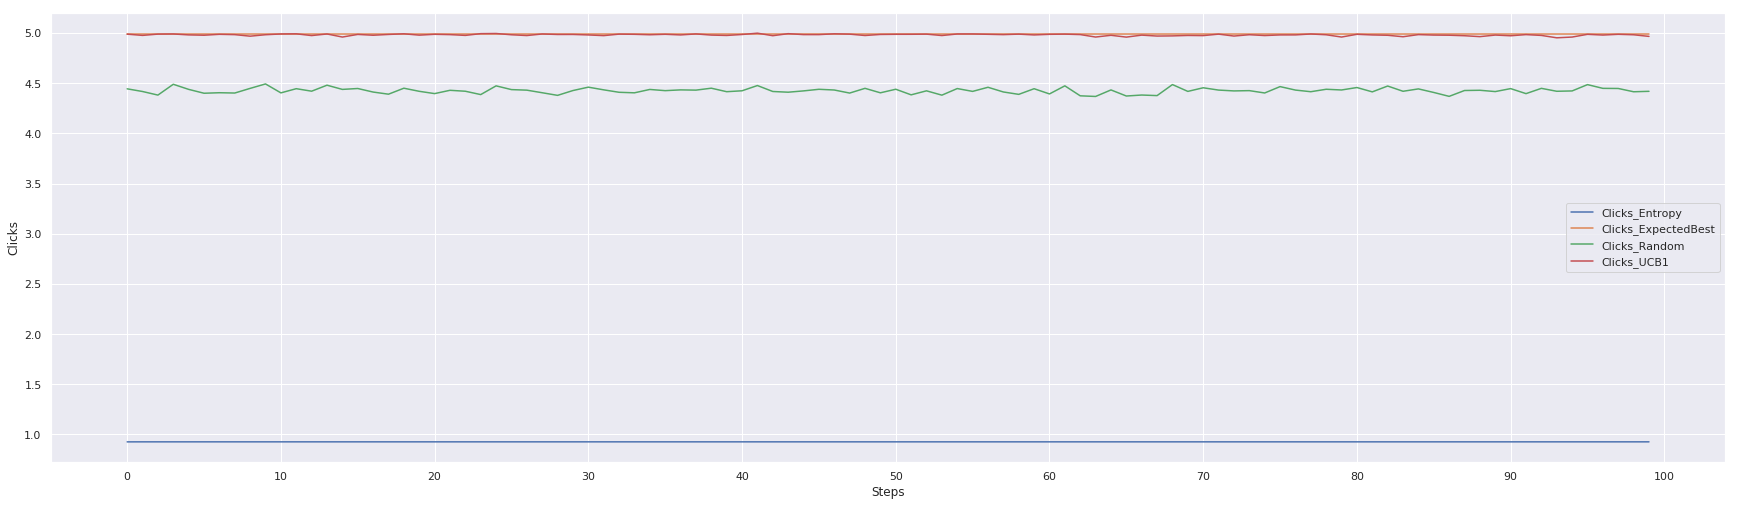

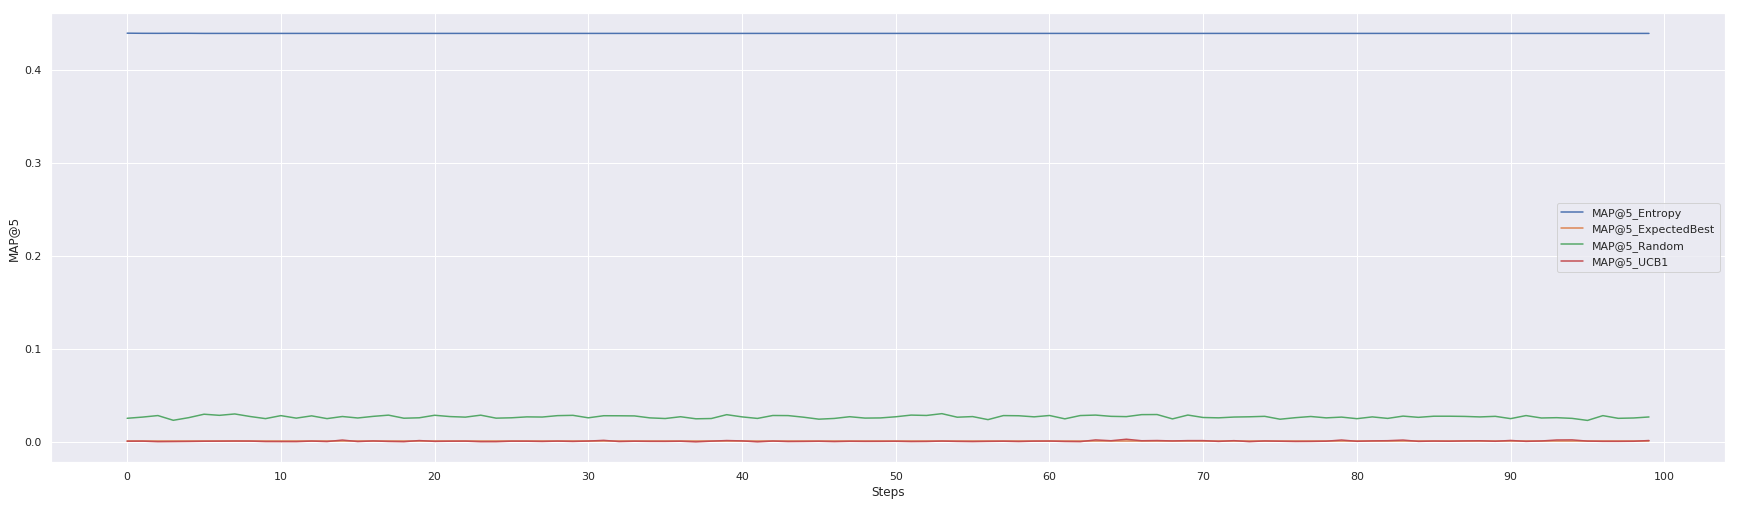

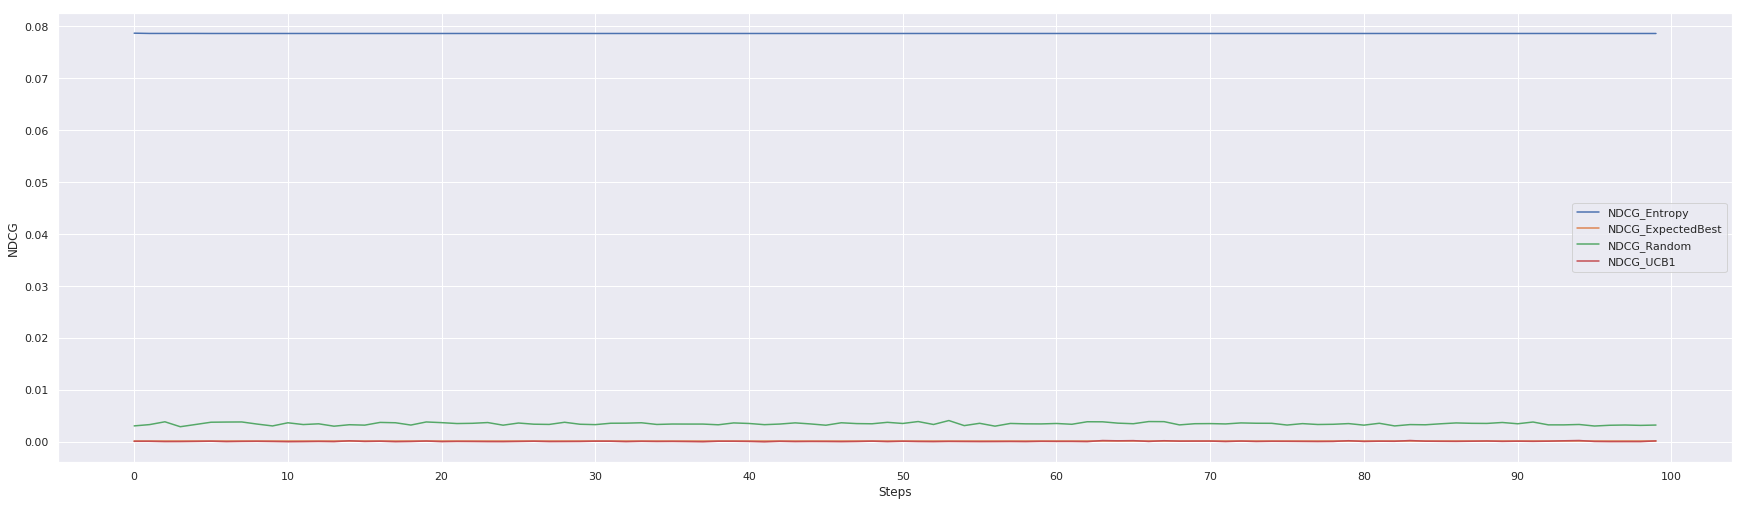

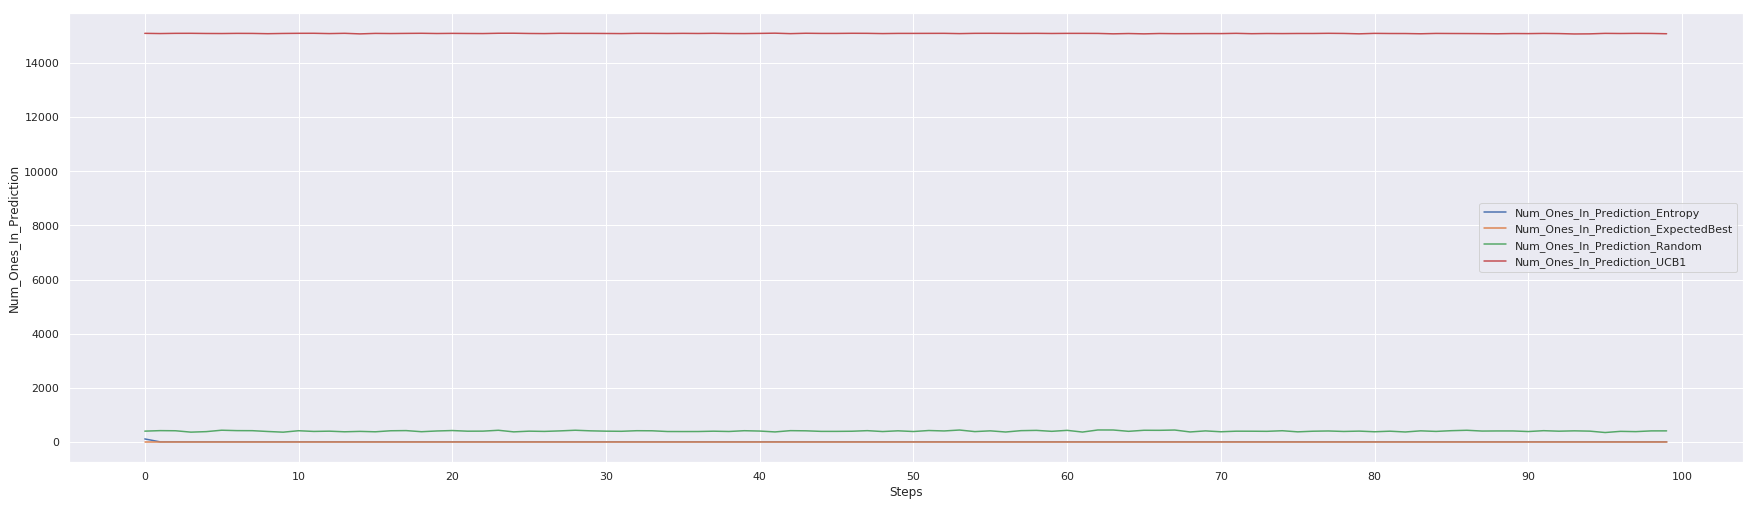

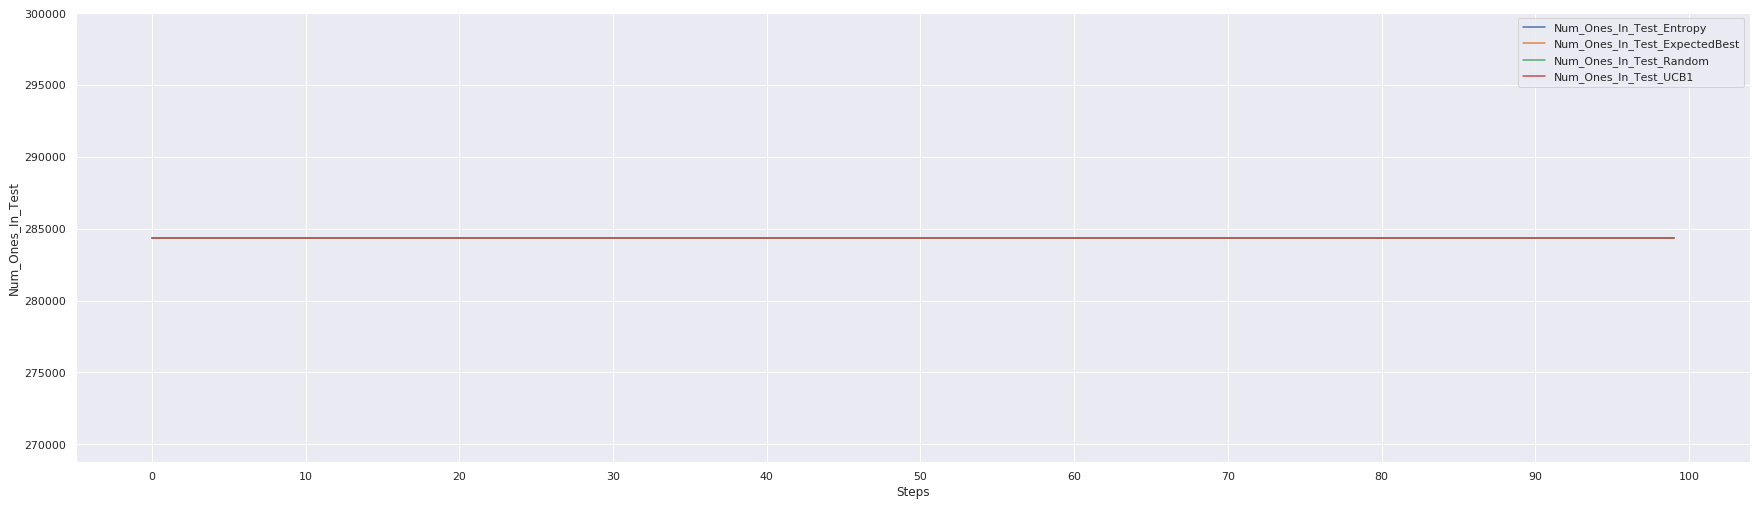

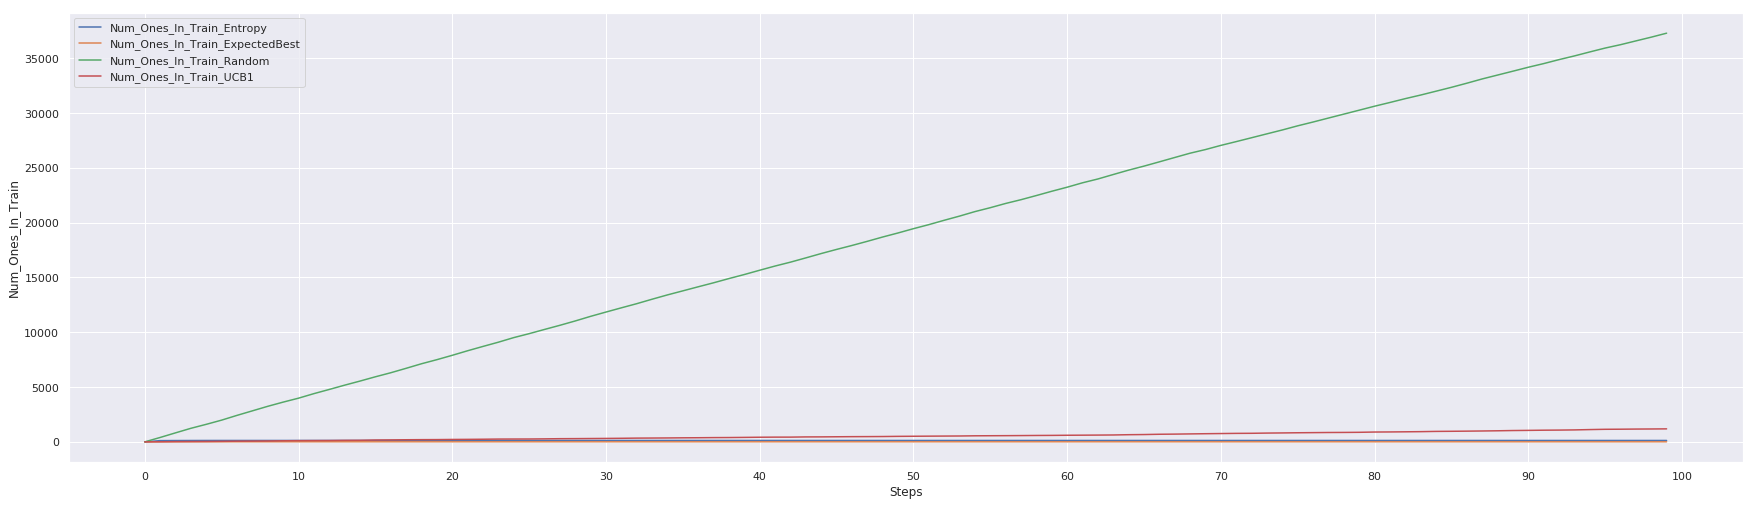

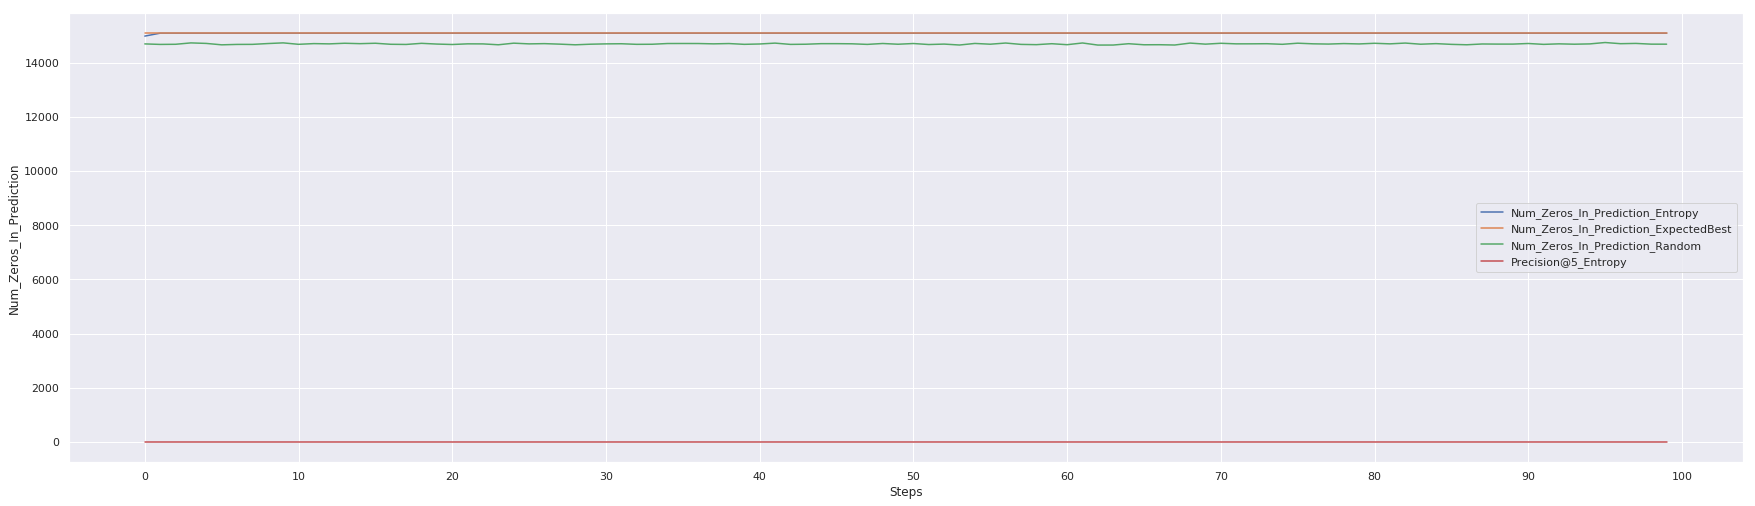

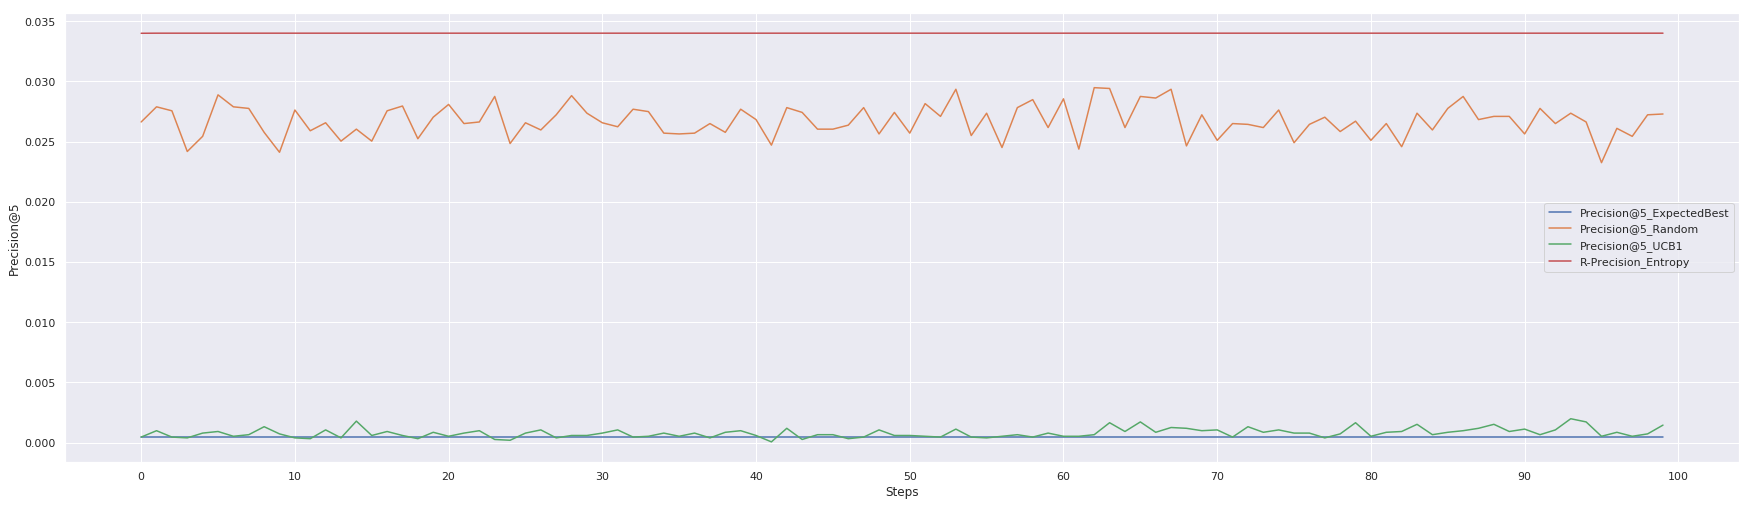

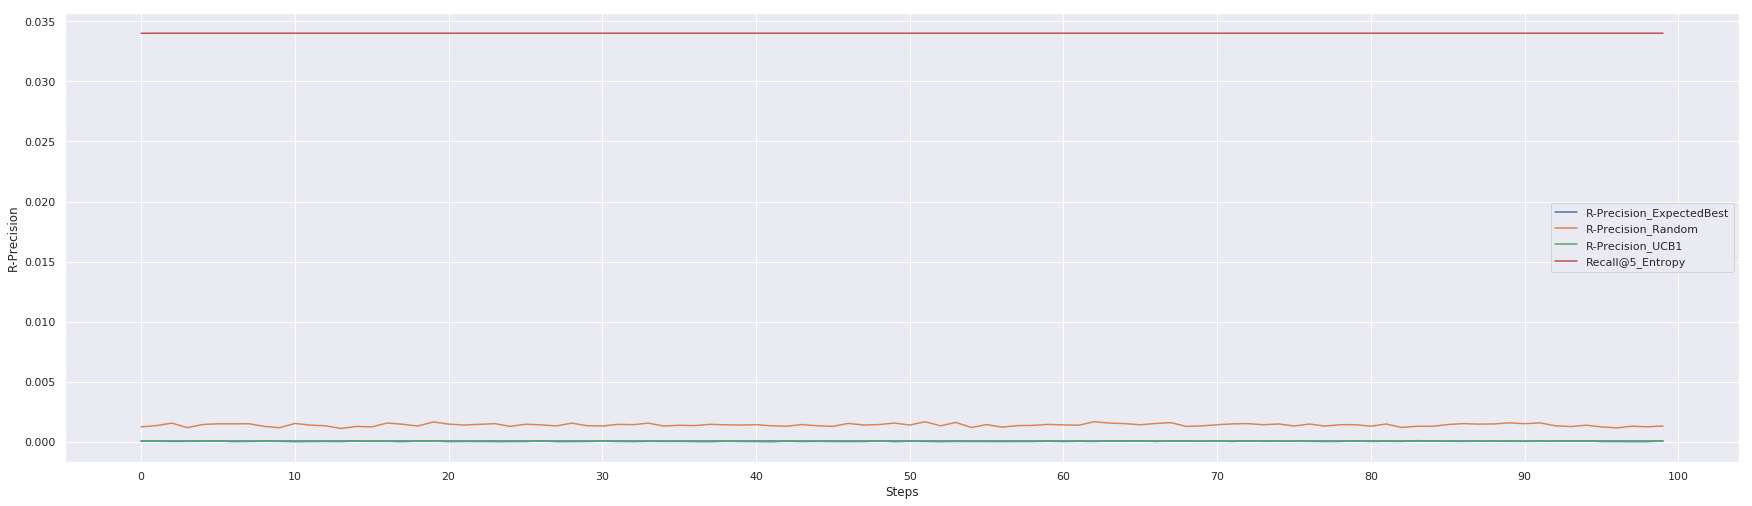

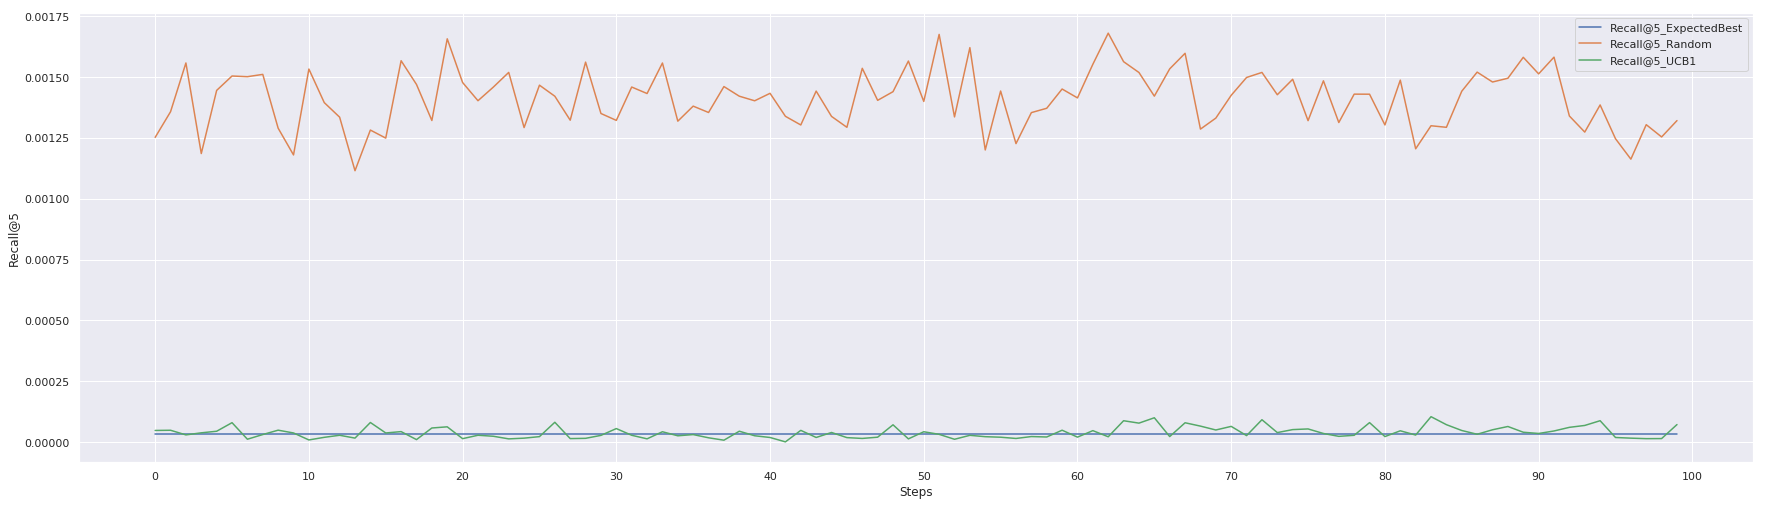

In [348]:
plot(["Random_IFVAE_Latent_True_100steps_5items_per_step_per_user",
     "ExpectedBest_IFVAE_Latent_True_100steps_5items_per_step_per_user",
     "Entropy_IFVAE_Latent_True_100steps_5items_per_step_per_user",
     "UCB1_IFVAE_Latent_True_100steps_5items_per_step_per_user"])

In [249]:
dd.iloc[:,0:5]

,Clicks_BestItem,Clicks_Entropy,Clicks_Random,Clicks_ThompsonSampling,Clicks_UCB1
0,4.157098,4.578946,4.935995,4.939241,4.132549
1,4.170583,4.580285,4.953271,4.950721,4.231433
2,4.250531,4.580212,4.946613,4.929452,4.306961
3,4.259817,4.579191,4.949975,4.941743,4.300133
4,4.313088,4.579191,4.954083,4.940119,4.326125
5,4.278168,4.579191,4.953238,4.949147,4.368650
6,4.314947,4.579191,4.944277,4.938479,4.413159
7,4.348141,4.579191,4.940036,4.946811,4.419358
8,4.348682,4.579191,4.942637,4.932731,4.437121
9,4.374227,4.579191,4.933527,4.939241,4.460230


In [252]:
dd.iloc[:,5:10]

,MAP@2_BestItem,MAP@2_Entropy,MAP@2_Random,MAP@2_ThompsonSampling,MAP@2_UCB1
0,0.092554,0.046049,0.006791,0.006543,0.094666
1,0.091067,0.046968,0.004679,0.005383,0.084631
2,0.082131,0.046652,0.005922,0.007330,0.075945
3,0.081245,0.046717,0.005094,0.006087,0.077028
4,0.078060,0.046717,0.004638,0.006170,0.072953
5,0.079273,0.046717,0.004845,0.005218,0.071185
6,0.073028,0.046717,0.005508,0.006460,0.063633
7,0.072470,0.046717,0.006626,0.004845,0.063332
8,0.071423,0.046717,0.005673,0.007040,0.060313
9,0.069108,0.046717,0.006999,0.006584,0.055236


In [254]:
dd.iloc[:,45:50]

,Recall@2_BestItem,Recall@2_Entropy,Recall@2_Random,Recall@2_ThompsonSampling,Recall@2_UCB1
0,0.020760,0.004766,0.000716,0.000689,0.021350
1,0.019747,0.004982,0.000357,0.000399,0.017762
2,0.017291,0.004970,0.000595,0.000575,0.016222
3,0.016928,0.005029,0.000424,0.000547,0.015533
4,0.016489,0.005029,0.000413,0.000554,0.016279
5,0.016785,0.005029,0.000437,0.000323,0.013857
6,0.015700,0.005029,0.000433,0.000686,0.013298
7,0.014295,0.005029,0.000558,0.000594,0.013363
8,0.014208,0.005029,0.000643,0.000666,0.011630
9,0.013371,0.005029,0.000573,0.000625,0.011299


In [255]:
dd

,Clicks_BestItem,Clicks_Entropy,Clicks_Random,Clicks_ThompsonSampling,Clicks_UCB1,MAP@2_BestItem,MAP@2_Entropy,MAP@2_Random,MAP@2_ThompsonSampling,MAP@2_UCB1,...,R-Precision_BestItem,R-Precision_Entropy,R-Precision_Random,R-Precision_ThompsonSampling,R-Precision_UCB1,Recall@2_BestItem,Recall@2_Entropy,Recall@2_Random,Recall@2_ThompsonSampling,Recall@2_UCB1
0,4.157098,4.578946,4.935995,4.939241,4.132549,0.092554,0.046049,0.006791,0.006543,0.094666,...,0.020594,0.004766,0.000716,0.000689,0.021185,0.020760,0.004766,0.000716,0.000689,0.021350
1,4.170583,4.580285,4.953271,4.950721,4.231433,0.091067,0.046968,0.004679,0.005383,0.084631,...,0.019582,0.004982,0.000357,0.000399,0.017596,0.019747,0.004982,0.000357,0.000399,0.017762
2,4.250531,4.580212,4.946613,4.929452,4.306961,0.082131,0.046652,0.005922,0.007330,0.075945,...,0.016959,0.004970,0.000595,0.000575,0.015559,0.017291,0.004970,0.000595,0.000575,0.016222
3,4.259817,4.579191,4.949975,4.941743,4.300133,0.081245,0.046717,0.005094,0.006087,0.077028,...,0.016596,0.005029,0.000424,0.000547,0.015035,0.016928,0.005029,0.000424,0.000547,0.015533
4,4.313088,4.579191,4.954083,4.940119,4.326125,0.078060,0.046717,0.004638,0.006170,0.072953,...,0.015991,0.005029,0.000413,0.000554,0.015947,0.016489,0.005029,0.000413,0.000554,0.016279
5,4.278168,4.579191,4.953238,4.949147,4.368650,0.079273,0.046717,0.004845,0.005218,0.071185,...,0.016286,0.005029,0.000437,0.000323,0.013525,0.016785,0.005029,0.000437,0.000323,0.013857
6,4.314947,4.579191,4.944277,4.938479,4.413159,0.073028,0.046717,0.005508,0.006460,0.063633,...,0.015201,0.005029,0.000433,0.000686,0.013132,0.015700,0.005029,0.000433,0.000686,0.013298
7,4.348141,4.579191,4.940036,4.946811,4.419358,0.072470,0.046717,0.006626,0.004845,0.063332,...,0.014129,0.005029,0.000558,0.000594,0.012697,0.014295,0.005029,0.000558,0.000594,0.013363
8,4.348682,4.579191,4.942637,4.932731,4.437121,0.071423,0.046717,0.005673,0.007040,0.060313,...,0.013541,0.005029,0.000643,0.000666,0.011130,0.014208,0.005029,0.000643,0.000666,0.011630
9,4.374227,4.579191,4.933527,4.939241,4.460230,0.069108,0.046717,0.006999,0.006584,0.055236,...,0.013371,0.005029,0.000573,0.000625,0.011299,0.013371,0.005029,0.000573,0.000625,0.011299


In [218]:
ThompsonSampling_100steps_2items_per_step_per_user_retrain_every_100steps = preprocess_df("ThompsonSampling_100steps_2items_per_step_per_user_retrain_every_100steps")
ThompsonSampling_100steps_2items_per_step_per_user_retrain_every_100steps.columns

ThompsonSampling


Index(['Clicks_ThompsonSampling', 'MAP@2_ThompsonSampling',
       'NDCG_ThompsonSampling', 'Num_Nonzero_In_Train_ThompsonSampling',
       'Num_Nonzero_In_Valid_ThompsonSampling',
       'Num_Unmasked_Negative_ThompsonSampling',
       'Num_Unmasked_Positive_ThompsonSampling',
       'Precision@2_ThompsonSampling', 'R-Precision_ThompsonSampling',
       'Recall@2_ThompsonSampling'],
      dtype='object')

In [135]:
BestItem_100steps_2items_per_step_per_user_retrain_every_100steps = preprocess_df("BestItem_100steps_2items_per_step_per_user_retrain_every_100steps")
BestItem_100steps_2items_per_step_per_user_retrain_every_100steps.columns = ["Clicks_BestItem", "MAP@2_BestItem", "NDCG_BestItem",
                                              "Num_Nonzero_In_Train_BestItem", "Num_Nonzero_In_Valid_BestItem",
                                              "Num_Unmasked_Negative_BestItem", "Num_Unmasked_Positive_BestItem",
                                              "Precision@2_BestItem", "R-Precision_BestItem", "Recall@2_BestItem"]
BestItem_100steps_2items_per_step_per_user_retrain_every_100steps

,Clicks_BestItem,MAP@2_BestItem,NDCG_BestItem,Num_Nonzero_In_Train_BestItem,Num_Nonzero_In_Valid_BestItem,Num_Unmasked_Negative_BestItem,Num_Unmasked_Positive_BestItem,Precision@2_BestItem,R-Precision_BestItem,Recall@2_BestItem
0,4.157098,0.092554,0.032736,289149,116263,10967,1109,0.091850,0.020594,0.020760
1,4.170583,0.091067,0.031260,290258,115154,10992,1084,0.089824,0.019582,0.019747
2,4.250531,0.082131,0.027471,291342,114070,11105,971,0.080514,0.016959,0.017291
3,4.259817,0.081245,0.026858,292313,113099,11110,966,0.080166,0.016596,0.016928
4,4.313088,0.078060,0.026158,293279,112133,11182,894,0.074240,0.015991,0.016489
5,4.278168,0.079273,0.026410,294173,111239,11143,933,0.077569,0.016286,0.016785
6,4.314947,0.073028,0.024539,295106,110306,11199,877,0.072986,0.015201,0.015700
7,4.348141,0.072470,0.023063,295983,109429,11225,851,0.070928,0.014129,0.014295
8,4.348682,0.071423,0.022758,296834,108578,11245,831,0.069296,0.013541,0.014208
9,4.374227,0.069108,0.021793,297665,107747,11263,813,0.067897,0.013371,0.013371


In [136]:
random_100times_2items_per_time_df = preprocess_df("Random_100times_2items_per_time_df")
random_100times_2items_per_time_df.columns = ["Clicks_Random", "MAP@2_Random", "NDCG_Random",
                                              "Num_Nonzero_In_Train_Random", "Num_Nonzero_In_Valid_Random",
                                              "Num_Unmasked_Negative_Random", "Num_Unmasked_Positive_Random",
                                              "Precision@2_Random", "R-Precision_Random", "Recall@2_Random"]
random_100times_2items_per_time_df

,Clicks_Random,MAP@2_Random,NDCG_Random,Num_Nonzero_In_Train_Random,Num_Nonzero_In_Valid_Random,Num_Unmasked_Negative_Random,Num_Unmasked_Positive_Random,Precision@2_Random,R-Precision_Random,Recall@2_Random
0,4.935995,0.006791,0.001493,289149,116263,11996,80,0.006626,0.000716,0.000716
1,4.953271,0.004679,0.000852,289229,116183,12019,57,0.004721,0.000357,0.000357
2,4.946613,0.005922,0.001239,289286,116126,12009,67,0.005549,0.000595,0.000595
3,4.949975,0.005094,0.000973,289353,116059,12015,61,0.005052,0.000424,0.000424
4,4.954083,0.004638,0.000888,289414,115998,12020,56,0.004638,0.000413,0.000413
5,4.953238,0.004845,0.000985,289470,115942,12019,57,0.004721,0.000437,0.000437
6,4.944277,0.005508,0.001014,289527,115885,12007,69,0.005715,0.000433,0.000433
7,4.940036,0.006626,0.001251,289596,115816,12002,74,0.006129,0.000558,0.000558
8,4.942637,0.005673,0.001229,289670,115742,12005,71,0.005880,0.000643,0.000643
9,4.933527,0.006999,0.001315,289741,115671,11995,81,0.006709,0.000573,0.000573


In [137]:
Entropy_100steps_2items_per_step_per_user_retrain_every_100steps = preprocess_df("Entropy_100steps_2items_per_step_per_user_retrain_every_100steps")
Entropy_100steps_2items_per_step_per_user_retrain_every_100steps.columns = ["Clicks_Retrain_Every_100_Steps_Entropy", "MAP@2_Retrain_Every_100_Steps_Entropy",
                                               "NDCG_Retrain_Every_100_Steps_Entropy", "Num_Nonzero_In_Train_Retrain_Every_100_Steps_Entropy",
                                               "Num_Nonzero_In_Valid_Retrain_Every_100_Steps_Entropy",
                                               "Num_Unmasked_Negative_Retrain_Every_100_Steps_Entropy",
                                               "Num_Unmasked_Positive_Retrain_Every_100_Steps_Entropy",
                                               "Precision@2_Retrain_Every_100_Steps_Entropy", "R-Precision_Retrain_Every_100_Steps_Entropy",
                                               "Recall@2_Retrain_Every_100_Steps_Entropy"]
Entropy_100steps_2items_per_step_per_user_retrain_every_100steps

,Clicks_Retrain_Every_100_Steps_Entropy,MAP@2_Retrain_Every_100_Steps_Entropy,NDCG_Retrain_Every_100_Steps_Entropy,Num_Nonzero_In_Train_Retrain_Every_100_Steps_Entropy,Num_Nonzero_In_Valid_Retrain_Every_100_Steps_Entropy,Num_Unmasked_Negative_Retrain_Every_100_Steps_Entropy,Num_Unmasked_Positive_Retrain_Every_100_Steps_Entropy,Precision@2_Retrain_Every_100_Steps_Entropy,R-Precision_Retrain_Every_100_Steps_Entropy,Recall@2_Retrain_Every_100_Steps_Entropy
0,4.578946,0.046049,0.009883,289149,116263,10938,1138,0.045387,0.004766,0.004766
1,4.580285,0.046968,0.010148,290287,115125,11780,296,0.045063,0.004982,0.004982
2,4.580212,0.046652,0.010118,290583,114829,11984,92,0.045078,0.004970,0.004970
3,4.579191,0.046717,0.010174,290675,114737,12047,29,0.045183,0.005029,0.005029
4,4.579191,0.046717,0.010174,290704,114708,12069,7,0.045183,0.005029,0.005029
5,4.579191,0.046717,0.010174,290711,114701,12072,4,0.045183,0.005029,0.005029
6,4.579191,0.046717,0.010174,290715,114697,12074,2,0.045183,0.005029,0.005029
7,4.579191,0.046717,0.010174,290717,114695,12076,0,0.045183,0.005029,0.005029
8,4.579191,0.046717,0.010174,290717,114695,12076,0,0.045183,0.005029,0.005029
9,4.579191,0.046717,0.010174,290717,114695,12076,0,0.045183,0.005029,0.005029


In [138]:
UCB1_100steps_2items_per_step_per_user_retrain_every_100steps = preprocess_df("UCB1_100steps_2items_per_step_per_user_retrain_every_100steps")
UCB1_100steps_2items_per_step_per_user_retrain_every_100steps.columns = ["Clicks_Retrain_Every_100_Steps_UCB1", "MAP@2_Retrain_Every_100_Steps_UCB1",
                                                 "NDCG_Retrain_Every_100_Steps_UCB1",
                                                 "Num_Nonzero_In_Train_Retrain_Every_100_Steps_UCB1",
                                                 "Num_Nonzero_In_Valid_Retrain_Every_100_Steps_UCB1",
                                                 "Num_Unmasked_Negative_Retrain_Every_100_Steps_UCB1",
                                                 "Num_Unmasked_Positive_Retrain_Every_100_Steps_UCB1",
                                                 "Precision@2_Retrain_Every_100_Steps_UCB1",
                                                 "R-Precision_Retrain_Every_100_Steps_UCB1",
                                                 "Recall@2_Retrain_Every_100_Steps_UCB1"]
UCB1_100steps_2items_per_step_per_user_retrain_every_100steps

,Clicks_Retrain_Every_100_Steps_UCB1,MAP@2_Retrain_Every_100_Steps_UCB1,NDCG_Retrain_Every_100_Steps_UCB1,Num_Nonzero_In_Train_Retrain_Every_100_Steps_UCB1,Num_Nonzero_In_Valid_Retrain_Every_100_Steps_UCB1,Num_Unmasked_Negative_Retrain_Every_100_Steps_UCB1,Num_Unmasked_Positive_Retrain_Every_100_Steps_UCB1,Precision@2_Retrain_Every_100_Steps_UCB1,R-Precision_Retrain_Every_100_Steps_UCB1,Recall@2_Retrain_Every_100_Steps_UCB1
0,4.132549,0.094666,0.033793,289149,116263,10940,1136,0.094086,0.021185,0.021350
1,4.231433,0.084631,0.028373,290285,115127,11071,1005,0.083264,0.017596,0.017762
2,4.306961,0.075945,0.025543,291290,114122,11167,909,0.075323,0.015559,0.016222
3,4.300133,0.077028,0.024914,292199,113213,11183,893,0.074083,0.015035,0.015533
4,4.326125,0.072953,0.025224,293092,112320,11205,871,0.072330,0.015947,0.016279
5,4.368650,0.071185,0.022519,293963,111449,11259,817,0.067902,0.013525,0.013857
6,4.413159,0.063633,0.021009,294780,110632,11320,756,0.062885,0.013132,0.013298
7,4.419358,0.063332,0.020947,295536,109876,11332,744,0.061917,0.012697,0.013363
8,4.437121,0.060313,0.018741,296280,109132,11360,716,0.059647,0.011130,0.011630
9,4.460230,0.055236,0.018132,296996,108416,11399,677,0.056445,0.011299,0.011299


In [139]:
df = pd.concat([random_100times_2items_per_time_df,
                Entropy_100steps_2items_per_step_per_user_retrain_every_100steps,
                UCB1_100steps_2items_per_step_per_user_retrain_every_100steps,
                BestItem_100steps_2items_per_step_per_user_retrain_every_100steps],
               axis=1)

# Generate Plots

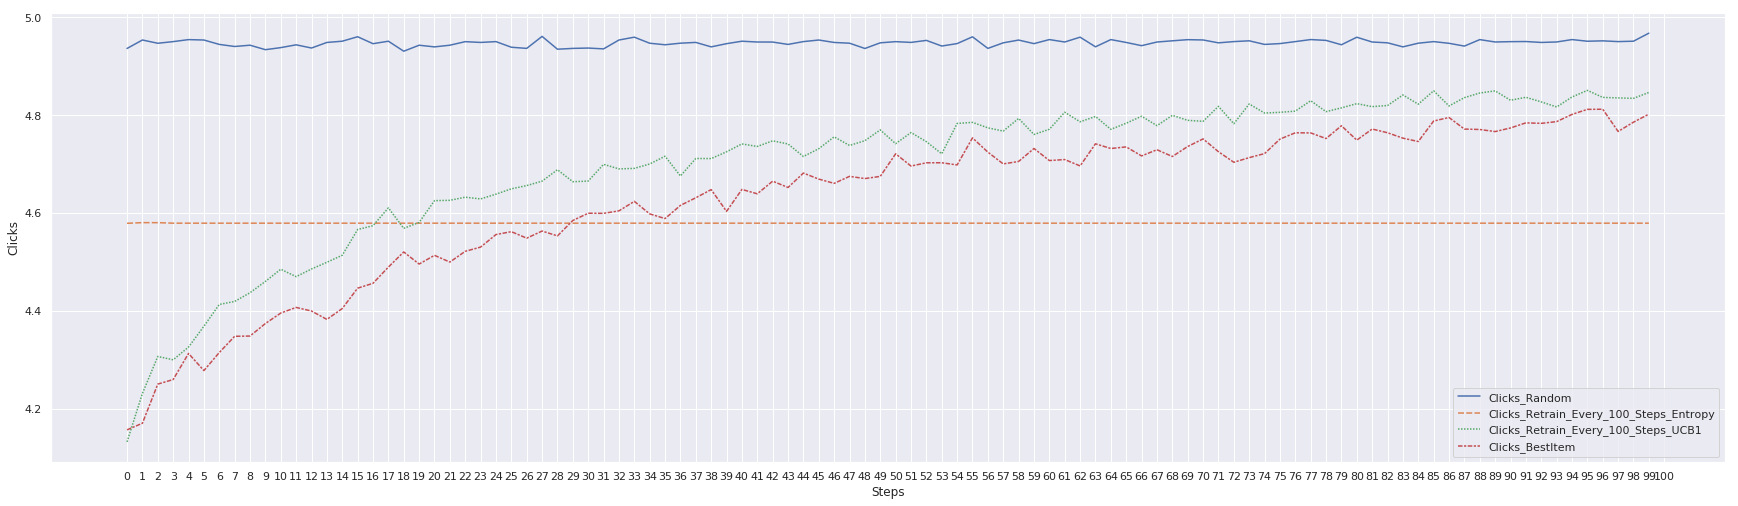

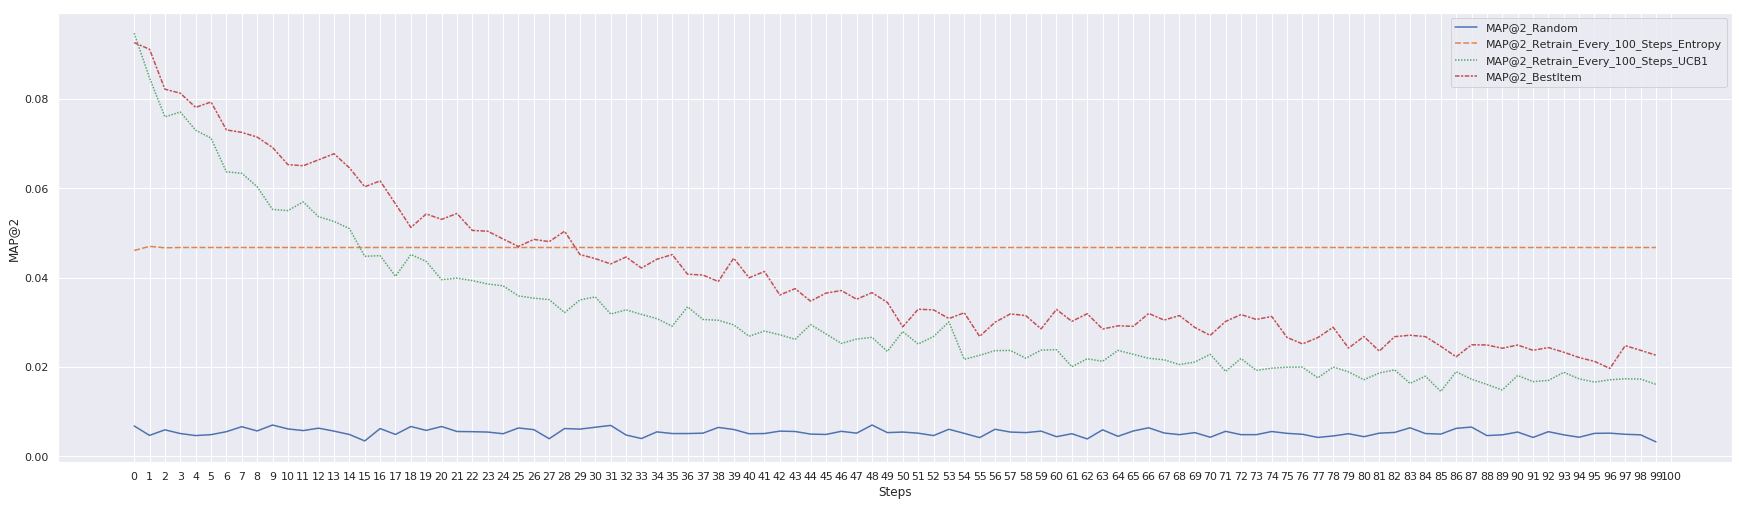

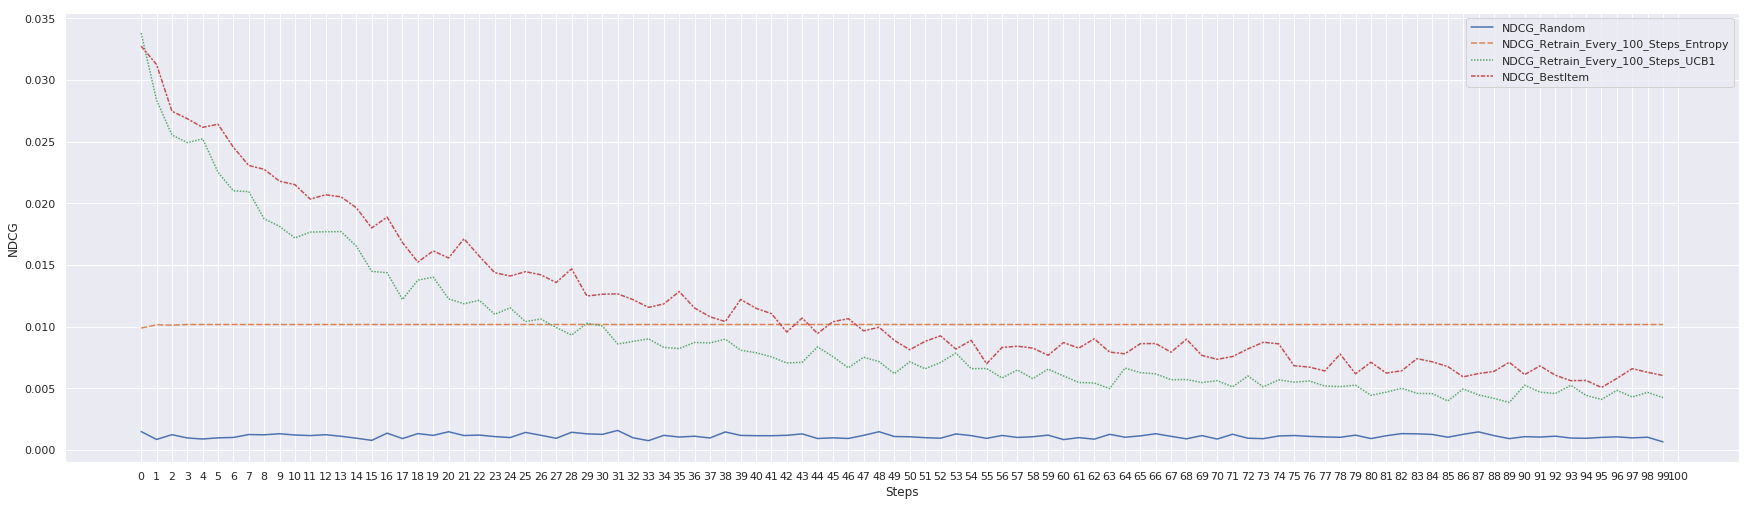

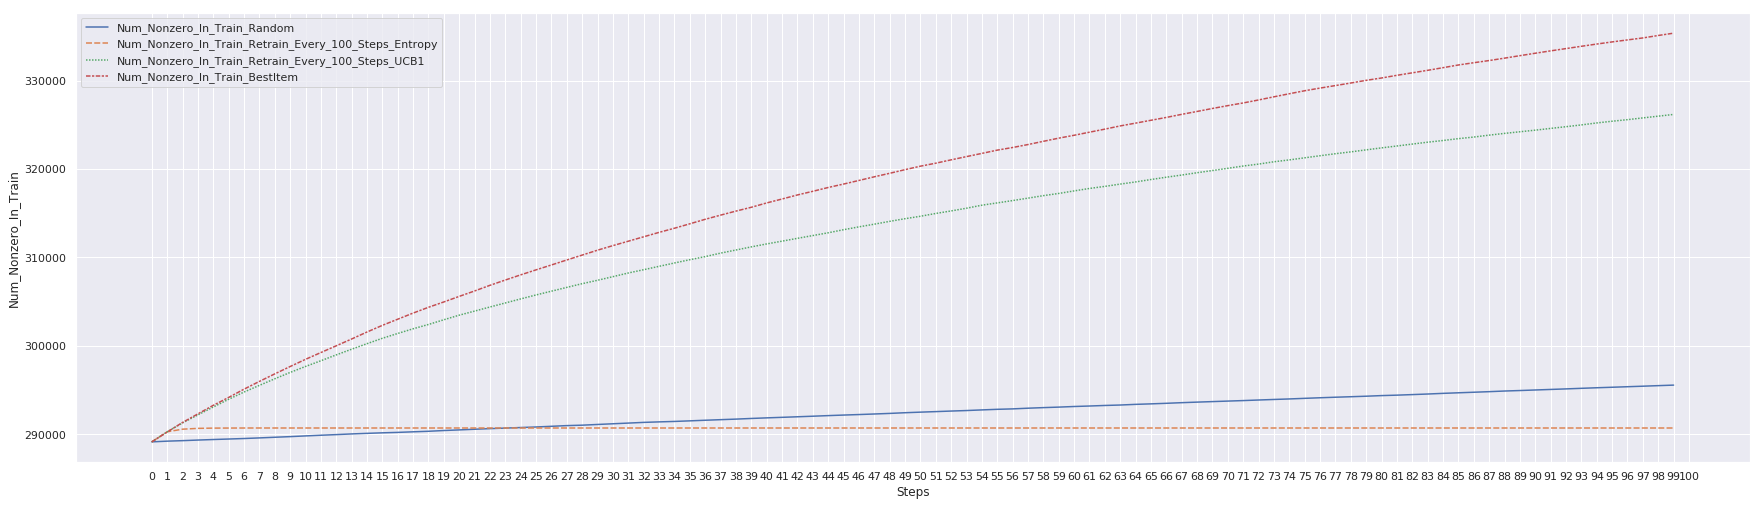

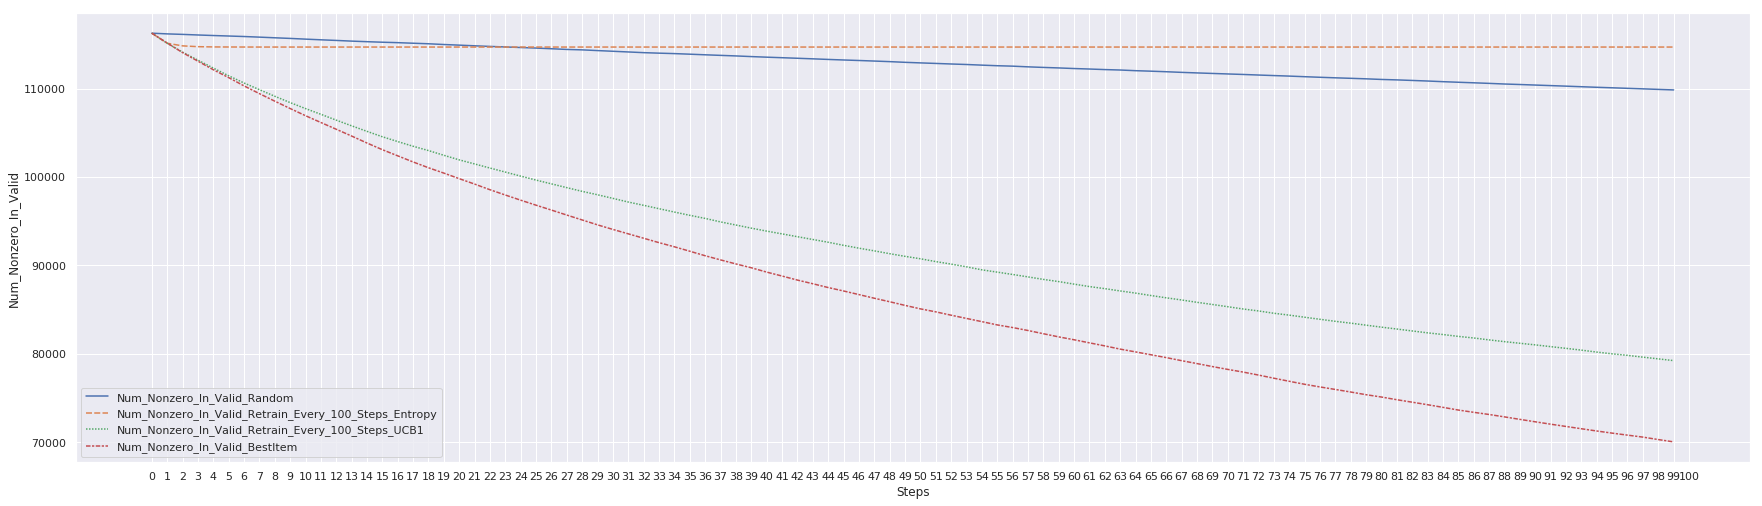

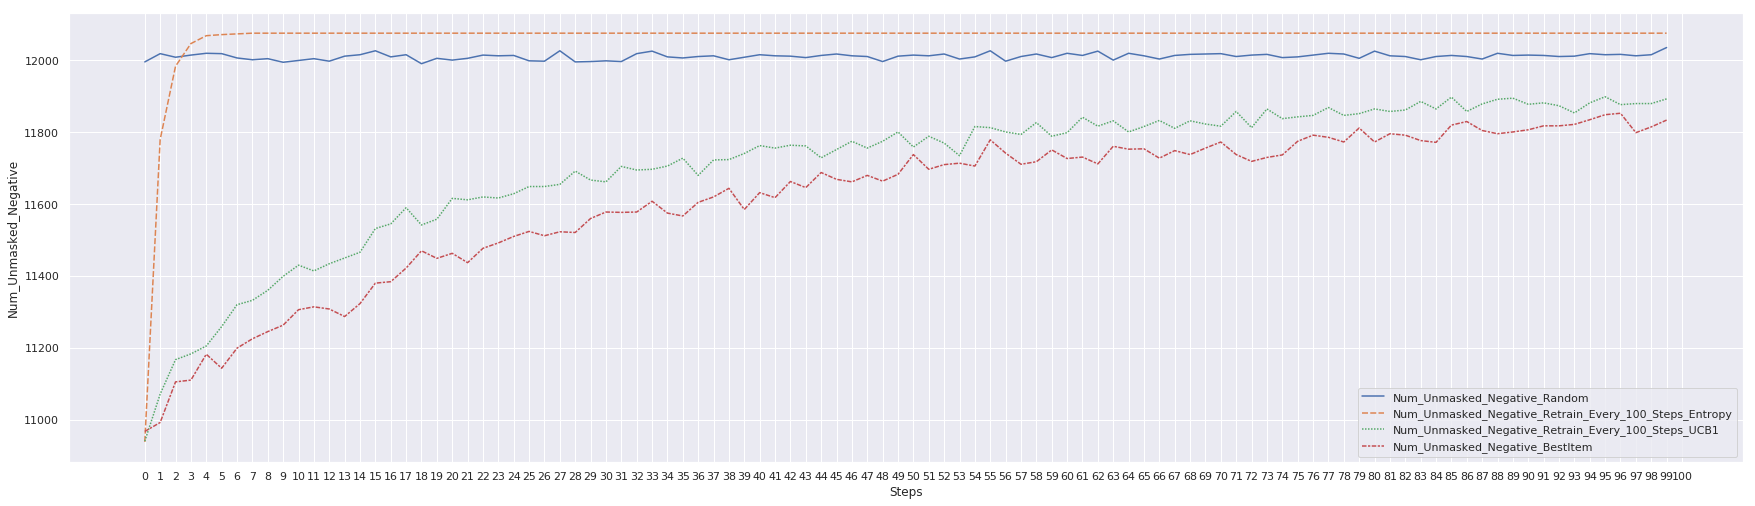

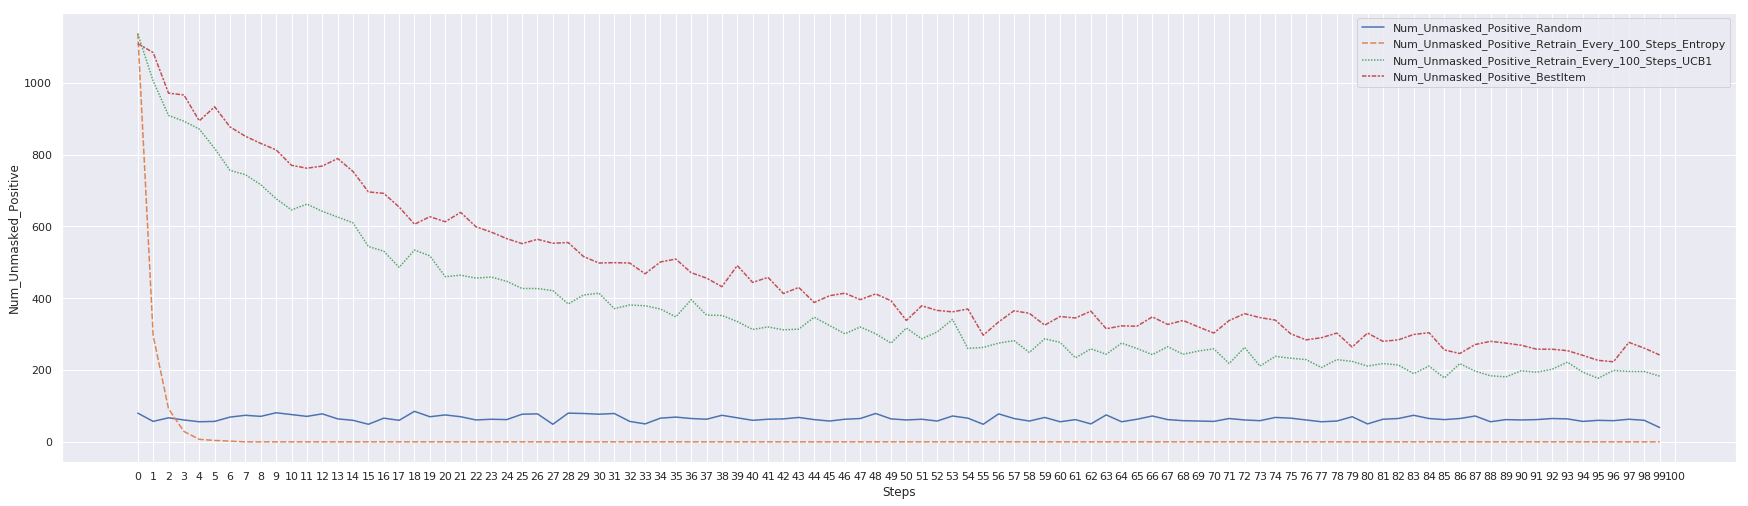

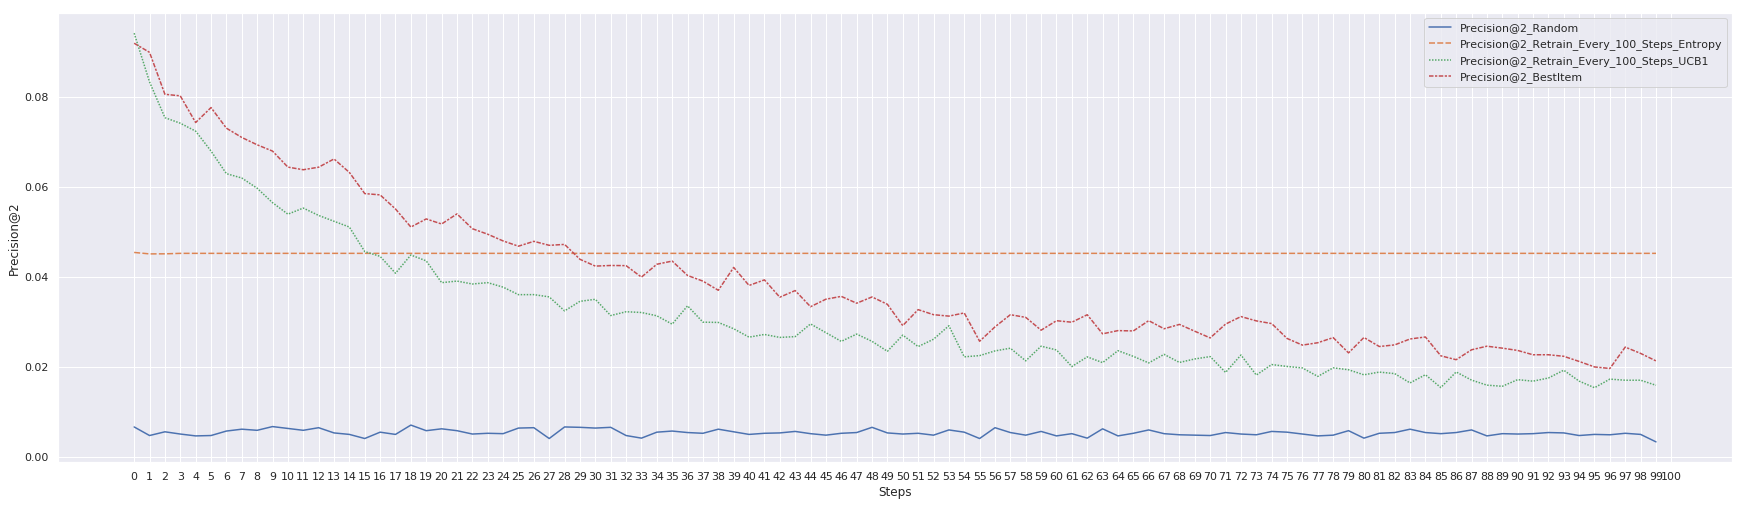

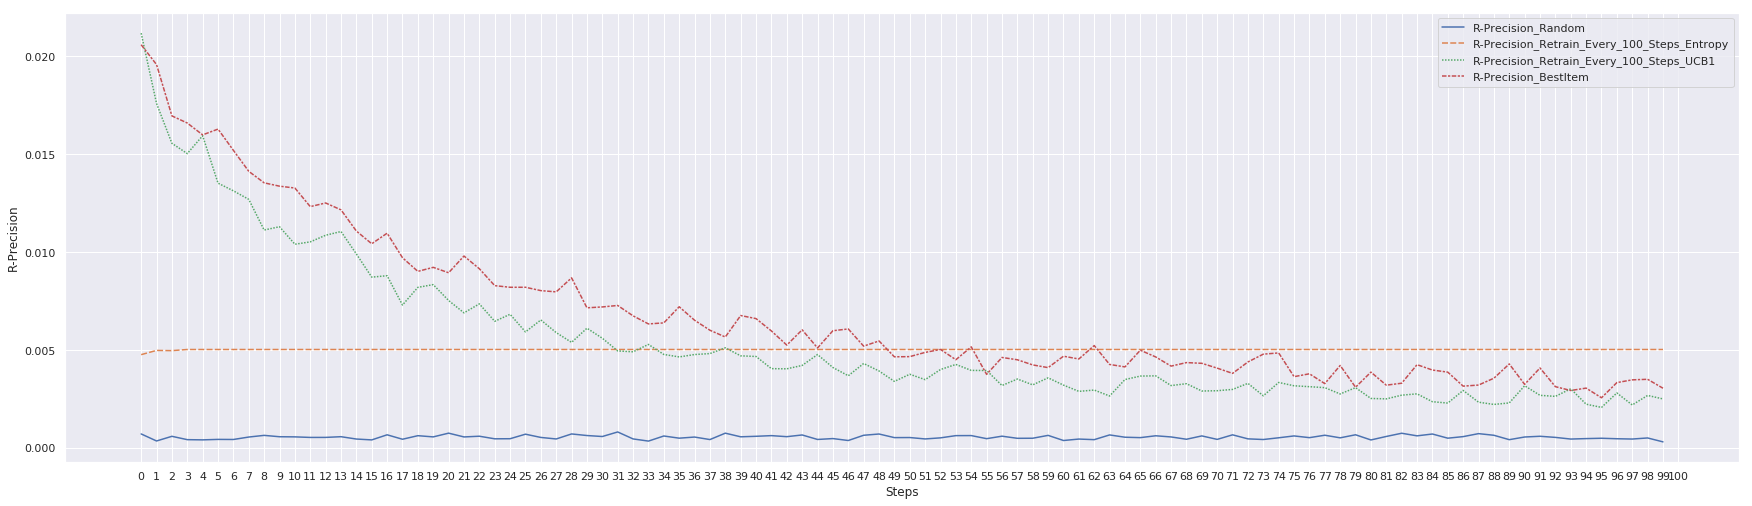

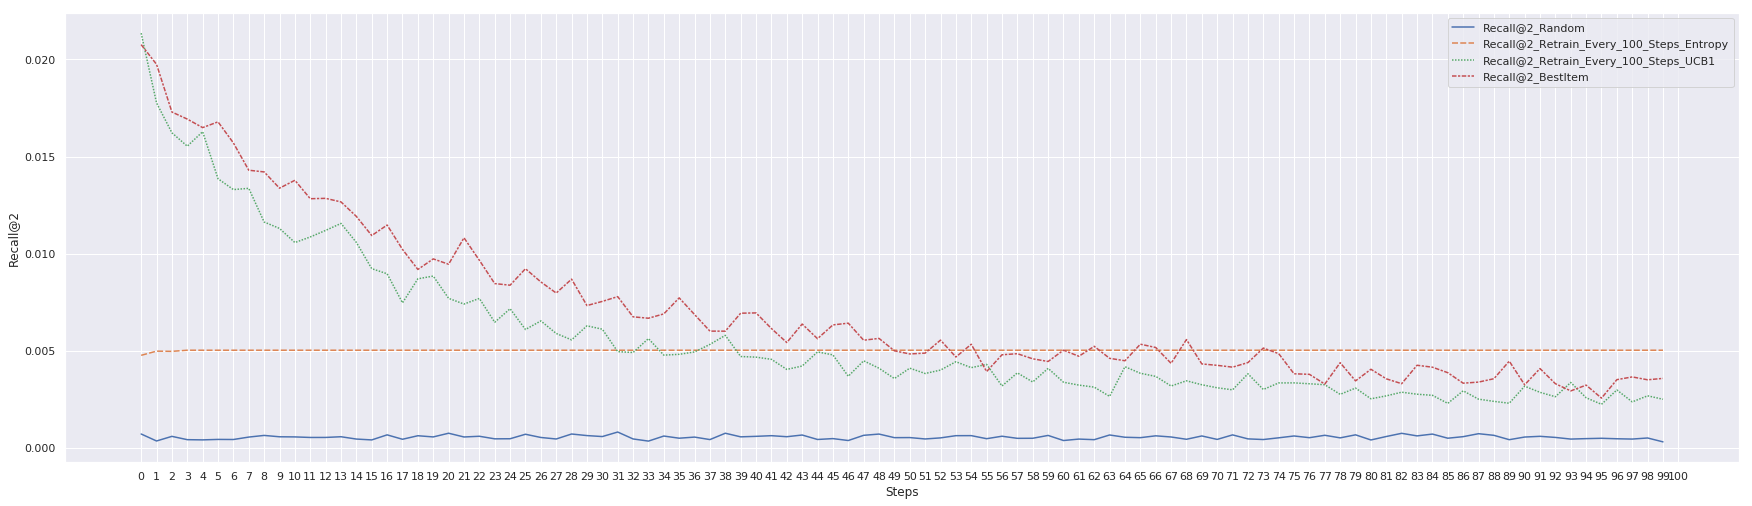

In [140]:
for i in range(10):
    fig, ax = plt.subplots()
    fig.set_size_inches(30, 8.27)

    ax = sns.lineplot(data=df[[df.columns[i],
                               df.columns[i+10],
                               df.columns[i+20],
                               df.columns[i+30],]],)
#                      dashes=False)
    metrics_name = df.columns[i][:df.columns[i].index("_Random")]
    ax.set(xticks=np.arange(0,101,1), xlabel='Steps', ylabel=metrics_name)
    file_name = metrics_name + '.png'
#     print(file_name)
    fig.savefig(file_name)

In [ ]:
["Clicks_Random", "MAP@2_Random", "NDCG_Random",
"Num_Nonzero_In_Train_Random", "Num_Nonzero_In_Valid_Random",
"Num_Unmasked_Negative_Random", "Num_Unmasked_Positive_Random",
"Precision@2_Random", "R-Precision_Random", "Recall@2_Random"]

["Clicks_Retrain_Everytime", "MAP@2_Retrain_Everytime", "NDCG_Retrain_Everytime",
 "Num_Nonzero_In_Train_Retrain_Everytime", "Num_Nonzero_In_Valid_Retrain_Everytime",
"Num_Unmasked_Negative_Retrain_Everytime", "Num_Unmasked_Positive_Retrain_Everytime",
"Precision@2_Retrain_Everytime", "R-Precision_Retrain_Everytime", "Recall@2_Retrain_Everytime"]

["Clicks_Retrain_Every_10_time", "MAP@2_Retrain_Every_10_time", "NDCG_Retrain_Every_10_time",
"Num_Nonzero_In_Train_Retrain_Every_10_time", "Num_Nonzero_In_Valid_Retrain_Every_10_time",
"Num_Unmasked_Negative_Retrain_Every_10_time", "Num_Unmasked_Positive_Retrain_Every_10_time",
"Precision@2_Retrain_Every_10_time", "R-Precision_Retrain_Every_10_time", "Recall@2_Retrain_Every_10_time"]

In [115]:
BestItem_100steps_2items_per_step_per_user_retrain_every_100steps_log = preprocess_df("BestItem_100steps_2items_per_step_per_user_retrain_every_100steps_log")
BestItem_100steps_2items_per_step_per_user_retrain_every_100steps_log.columns = ["Clicks_BestItem_log", "MAP@2_BestItem_log", "NDCG_BestItem_log",
                                              "Num_Nonzero_In_Train_BestItem_log", "Num_Nonzero_In_Valid_BestItem_log",
                                              "Num_Unmasked_Negative_BestItem_log", "Num_Unmasked_Positive_BestItem_log",
                                              "Precision@2_BestItem_log", "R-Precision_BestItem_log", "Recall@2_BestItem_log"]
BestItem_100steps_2items_per_step_per_user_retrain_every_100steps_log

,Clicks_BestItem_log,MAP@2_BestItem_log,NDCG_BestItem_log,Num_Nonzero_In_Train_BestItem_log,Num_Nonzero_In_Valid_BestItem_log,Num_Unmasked_Negative_BestItem_log,Num_Unmasked_Positive_BestItem_log,Precision@2_BestItem_log,R-Precision_BestItem_log,Recall@2_BestItem_log
0,4.157048,0.093051,0.033055,289149,116263,10961,1115,0.092347,0.021025,0.021025
1,4.205633,0.089836,0.030536,290264,115148,11037,1039,0.086067,0.018823,0.019486
2,4.216833,0.086111,0.029709,291303,114109,11055,1021,0.084660,0.018503,0.018668
3,4.304067,0.076154,0.025694,292324,113088,11179,897,0.074452,0.015849,0.016015
4,4.288470,0.078792,0.027057,293221,112191,11161,915,0.076009,0.016532,0.017363
5,4.264515,0.081392,0.027434,294136,111276,11123,953,0.079271,0.016633,0.017299
6,4.298901,0.074534,0.025238,295089,110323,11174,902,0.075117,0.016017,0.016017
7,4.315086,0.075596,0.024741,295991,109421,11196,880,0.073346,0.015567,0.015567
8,4.354565,0.071566,0.023152,296871,108541,11257,819,0.068353,0.013800,0.014634
9,4.393365,0.064140,0.020355,297690,107722,11297,779,0.065101,0.012376,0.012711


In [119]:
Entropy_100steps_2items_per_step_per_user_retrain_every_10steps = preprocess_df("Entropy_100steps_2items_per_step_per_user_retrain_every_10steps")
Entropy_100steps_2items_per_step_per_user_retrain_every_10steps.columns = ["Clicks_Retrain_Every_10_Steps_Entropy", "MAP@2_Retrain_Every_10_Steps_Entropy",
                                                 "NDCG_Retrain_Every_10_Steps_Entropy",
                                                 "Num_Nonzero_In_Train_Retrain_Every_10_Steps_Entropy",
                                                 "Num_Nonzero_In_Valid_Retrain_Every_10_Steps_Entropy",
                                                 "Num_Unmasked_Negative_Retrain_Every_10_Steps_Entropy",
                                                 "Num_Unmasked_Positive_Retrain_Every_10_Steps_Entropy",
                                                 "Precision@2_Retrain_Every_10_Steps_Entropy",
                                                 "R-Precision_Retrain_Every_10_Steps_Entropy",
                                                 "Recall@2_Retrain_Every_10_Steps_Entropy"]
Entropy_100steps_2items_per_step_per_user_retrain_every_10steps

,Clicks_Retrain_Every_10_Steps_Entropy,MAP@2_Retrain_Every_10_Steps_Entropy,NDCG_Retrain_Every_10_Steps_Entropy,Num_Nonzero_In_Train_Retrain_Every_10_Steps_Entropy,Num_Nonzero_In_Valid_Retrain_Every_10_Steps_Entropy,Num_Unmasked_Negative_Retrain_Every_10_Steps_Entropy,Num_Unmasked_Positive_Retrain_Every_10_Steps_Entropy,Precision@2_Retrain_Every_10_Steps_Entropy,R-Precision_Retrain_Every_10_Steps_Entropy,Recall@2_Retrain_Every_10_Steps_Entropy
0,4.886798,0.011719,0.004698,289149,116263,11532,544,0.011512,0.003143,0.003143
1,4.924520,0.007828,0.004055,289693,115719,11933,143,0.007704,0.002934,0.002934
2,4.926959,0.007622,0.003941,289836,115576,12032,44,0.007457,0.002863,0.002863
3,4.926906,0.007709,0.003971,289880,115532,12069,7,0.007460,0.002864,0.002864
4,4.926906,0.007709,0.003971,289887,115525,12074,2,0.007460,0.002864,0.002864
5,4.926906,0.007709,0.003971,289889,115523,12074,2,0.007460,0.002864,0.002864
6,4.926906,0.007709,0.003971,289891,115521,12074,2,0.007460,0.002864,0.002864
7,4.926923,0.007626,0.003943,289893,115519,12076,0,0.007460,0.002864,0.002864
8,4.927719,0.007667,0.003922,289893,115519,12075,1,0.007377,0.002809,0.002809
9,4.927719,0.007667,0.003922,289894,115518,12076,0,0.007377,0.002809,0.002809


In [120]:
Entropy_100steps_2items_per_step_per_user_retrain_every_1steps = preprocess_df("Entropy_100steps_2items_per_step_per_user_retrain_every_1steps")
Entropy_100steps_2items_per_step_per_user_retrain_every_1steps.columns = ["Clicks_Retrain_Every_1_Steps_Entropy", "MAP@2_Retrain_Every_1_Steps_Entropy",
                                                 "NDCG_Retrain_Every_1_Steps_Entropy",
                                                 "Num_Nonzero_In_Train_Retrain_Every_1_Steps_Entropy",
                                                 "Num_Nonzero_In_Valid_Retrain_Every_1_Steps_Entropy",
                                                 "Num_Unmasked_Negative_Retrain_Every_1_Steps_Entropy",
                                                 "Num_Unmasked_Positive_Retrain_Every_1_Steps_Entropy",
                                                 "Precision@2_Retrain_Every_1_Steps_Entropy",
                                                 "R-Precision_Retrain_Every_1_Steps_Entropy",
                                                 "Recall@2_Retrain_Every_1_Steps_Entropy"]
Entropy_100steps_2items_per_step_per_user_retrain_every_1steps

,Clicks_Retrain_Every_1_Steps_Entropy,MAP@2_Retrain_Every_1_Steps_Entropy,NDCG_Retrain_Every_1_Steps_Entropy,Num_Nonzero_In_Train_Retrain_Every_1_Steps_Entropy,Num_Nonzero_In_Valid_Retrain_Every_1_Steps_Entropy,Num_Unmasked_Negative_Retrain_Every_1_Steps_Entropy,Num_Unmasked_Positive_Retrain_Every_1_Steps_Entropy,Precision@2_Retrain_Every_1_Steps_Entropy,R-Precision_Retrain_Every_1_Steps_Entropy,Recall@2_Retrain_Every_1_Steps_Entropy
0,4.890210,0.010726,0.004724,289149,116263,11569,507,0.011181,0.003196,0.003361
1,4.926214,0.007332,0.003860,289656,115756,11857,219,0.007539,0.002824,0.002824
2,4.924602,0.007170,0.003789,289875,115537,11955,121,0.007709,0.002787,0.002787
3,4.920544,0.007337,0.004069,289996,115416,12007,69,0.008208,0.003097,0.003097
4,4.929663,0.005928,0.003384,290065,115347,12018,58,0.007213,0.002535,0.002701
5,4.933626,0.006218,0.003450,290123,115289,12038,38,0.006798,0.002476,0.002642
6,4.939347,0.005720,0.003078,290161,115251,12035,41,0.006135,0.002161,0.002327
7,4.940889,0.006052,0.003089,290202,115210,12037,39,0.005969,0.002085,0.002251
8,4.945904,0.005058,0.003002,290241,115171,12050,26,0.005473,0.002213,0.002379
9,4.941052,0.005142,0.002777,290267,115145,12045,31,0.005971,0.002054,0.002054


In [206]:
# bayesian_optimization_util.py
import numpy as np

import matplotlib.pyplot as plt

def plot_approximation(gpr, X, Y, X_sample, Y_sample, X_next=None, show_legend=False):
    mu, std = gpr.predict(X, return_std=True)
    plt.fill_between(X.ravel(), 
                     mu.ravel() + 1.96 * std, 
                     mu.ravel() - 1.96 * std, 
                     alpha=0.1) 
    plt.plot(X, Y, 'y--', lw=1, label='Noise-free objective')
    plt.plot(X, mu, 'b-', lw=1, label='Surrogate function')
    plt.plot(X_sample, Y_sample, 'kx', mew=3, label='Noisy samples')
    if X_next:
        plt.axvline(x=X_next, ls='--', c='k', lw=1)
    if show_legend:
        plt.legend()

def plot_acquisition(X, Y, X_next, show_legend=False):
    plt.plot(X, Y, 'r-', lw=1, label='Acquisition function')
    plt.axvline(x=X_next, ls='--', c='k', lw=1, label='Next sampling location')
    if show_legend:
        plt.legend()    
        
def plot_convergence(X_sample, Y_sample, n_init=2):
    plt.figure(figsize=(12, 3))

    x = X_sample[n_init:].ravel()
    y = Y_sample[n_init:].ravel()
    r = range(1, len(x)+1)
    
    x_neighbor_dist = [np.abs(a-b) for a, b in zip(x, x[1:])]
    y_max_watermark = np.maximum.accumulate(y)
    
    plt.subplot(1, 2, 1)
    plt.plot(r[1:], x_neighbor_dist, 'bo-')
    plt.xlabel('Iteration')
    plt.ylabel('Distance')
    plt.title('Distance between consecutive x\'s')

    plt.subplot(1, 2, 2)
    plt.plot(r, y_max_watermark, 'ro-')
    plt.xlabel('Iteration')
    plt.ylabel('Best Y')
    plt.title('Value of best selected sample')

In [207]:
import numpy as np

%matplotlib inline

bounds = np.array([[-1.0, 2.0]])
noise = 0.2

def f(X, noise=noise):
    return -np.sin(3*X) - X**2 + 0.7*X + noise * np.random.randn(*X.shape)

X_init = np.array([[-0.9], [1.1]])
Y_init = f(X_init)

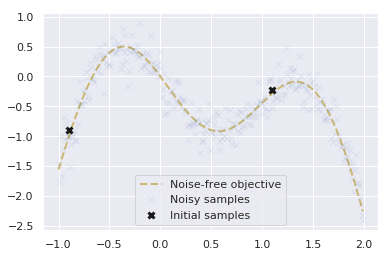

In [208]:
import matplotlib.pyplot as plt

# Dense grid of points within bounds
X = np.arange(bounds[:, 0], bounds[:, 1], 0.01).reshape(-1, 1)

# Noise-free objective function values at X 
Y = f(X,0)

# Plot optimization objective with noise level 
plt.plot(X, Y, 'y--', lw=2, label='Noise-free objective')
plt.plot(X, f(X), 'bx', lw=1, alpha=0.1, label='Noisy samples')
plt.plot(X_init, Y_init, 'kx', mew=3, label='Initial samples')
plt.legend();

In [209]:
from scipy.stats import norm

def expected_improvement(X, X_sample, Y_sample, gpr, xi=0.01):
    ''' Computes the EI at points X based on existing samples X_sample and Y_sample using a Gaussian process surrogate model. 
    Args: X: Points at which EI shall be computed (m x d). 
    X_sample: Sample locations (n x d). 
    Y_sample: Sample values (n x 1). 
    gpr: A GaussianProcessRegressor fitted to samples. 
    xi: Exploitation-exploration trade-off parameter. 
    Returns: Expected improvements at points X. '''
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample = gpr.predict(X_sample)

    sigma = sigma.reshape(-1, X_sample.shape[1])
    
    # Needed for noise-based model,
    # otherwise use np.max(Y_sample).
    # See also section 2.4 in [...]
    mu_sample_opt = np.max(mu_sample)

    with np.errstate(divide='warn'):
        imp = mu - mu_sample_opt - xi
        Z = imp / sigma
        ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0

    return ei

In [210]:
from scipy.optimize import minimize

def propose_location(acquisition, X_sample, Y_sample, gpr, bounds, n_restarts=25):
    ''' Proposes the next sampling point by optimizing the acquisition function. 
    Args: acquisition: Acquisition function. 
    X_sample: Sample locations (n x d). 
    Y_sample: Sample values (n x 1). 
    gpr: A GaussianProcessRegressor fitted to samples. 
    Returns: Location of the acquisition function maximum. '''
    dim = X_sample.shape[1]
    min_val = 1
    min_x = None
    
    def min_obj(X):
        # Minimization objective is the negative acquisition function
        return -acquisition(X.reshape(-1, dim), X_sample, Y_sample, gpr)
    
    # Find the best optimum by starting from n_restart different random points.
    for x0 in np.random.uniform(bounds[:, 0], bounds[:, 1], size=(n_restarts, dim)):
        res = minimize(min_obj, x0=x0, bounds=bounds, method='L-BFGS-B')        
        if res.fun < min_val:
            min_val = res.fun[0]
            min_x = res.x           
            
    return min_x.reshape(-1, 1)


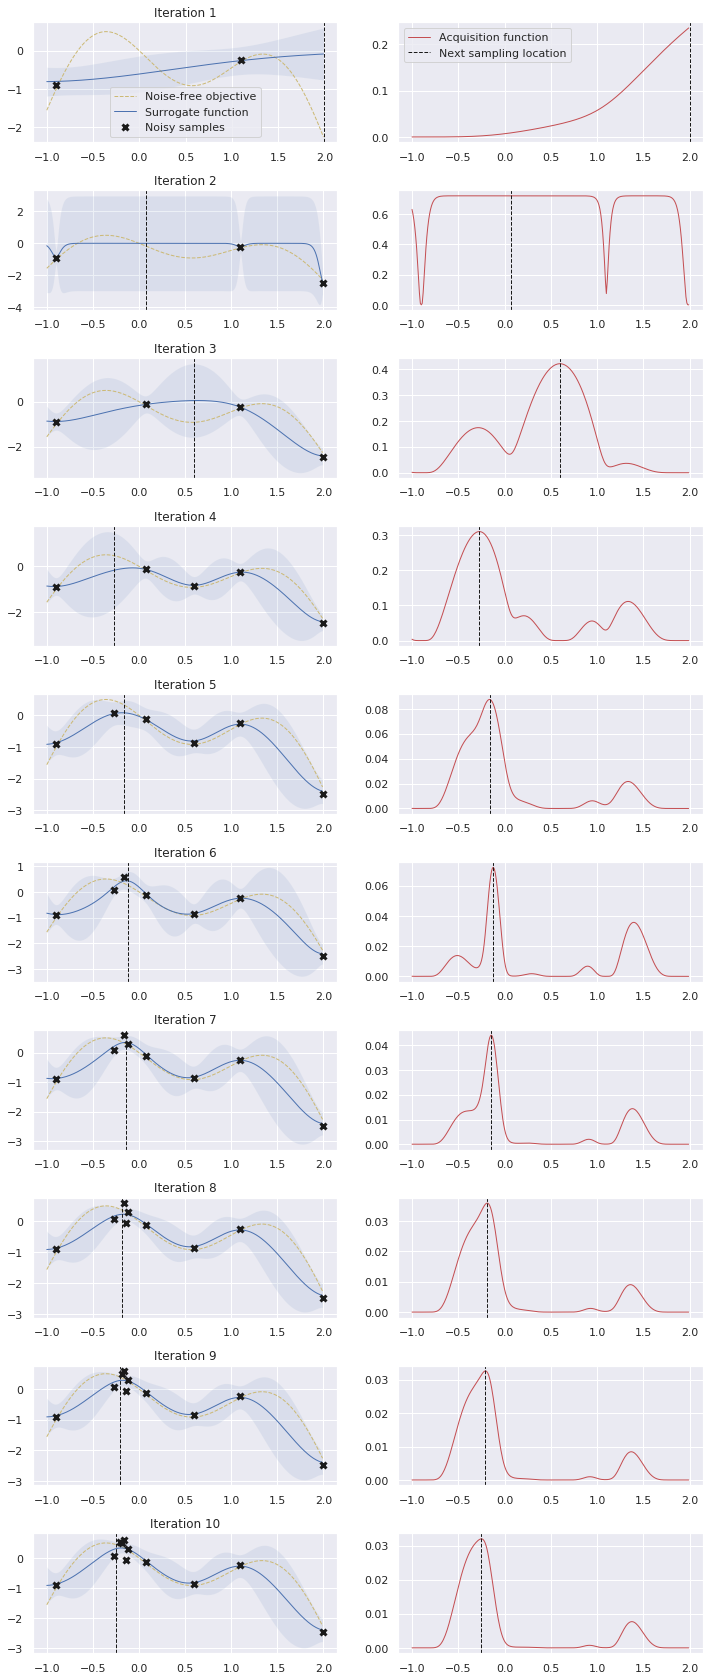

In [211]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, Matern
# from bayesian_optimization_util import plot_approximation, plot_acquisition

# Gaussian process with Mat??rn kernel as surrogate model
m52 = ConstantKernel(1.0) * Matern(length_scale=1.0, nu=2.5)
gpr = GaussianProcessRegressor(kernel=m52, alpha=noise**2)

# Initialize samples
X_sample = X_init
Y_sample = Y_init

# Number of iterations
n_iter = 10

plt.figure(figsize=(12, n_iter * 3))
plt.subplots_adjust(hspace=0.4)

for i in range(n_iter):
    # Update Gaussian process with existing samples
    gpr.fit(X_sample, Y_sample)

    # Obtain next sampling point from the acquisition function (expected_improvement)
    X_next = propose_location(expected_improvement, X_sample, Y_sample, gpr, bounds)
    
    # Obtain next noisy sample from the objective function
    Y_next = f(X_next, noise)
    
    # Plot samples, surrogate function, noise-free objective and next sampling location
    plt.subplot(n_iter, 2, 2 * i + 1)
    plot_approximation(gpr, X, Y, X_sample, Y_sample, X_next, show_legend=i==0)
    plt.title(f'Iteration {i+1}')

    plt.subplot(n_iter, 2, 2 * i + 2)
    plot_acquisition(X, expected_improvement(X, X_sample, Y_sample, gpr), X_next, show_legend=i==0)
    
    # Add sample to previous samples
    X_sample = np.vstack((X_sample, X_next))
    Y_sample = np.vstack((Y_sample, Y_next))

In [220]:
def ucb(probs, num_arms):
    return probs + np.sqrt(2 * np.log(4)/1)

In [ ]:
probs = np.array([0.6, 0.2, 0.5, 0.4])
ucb()

In [581]:
class UCB1(object):
    def __init__(self, counts, average_reward, num_arms):
        self.counts = counts
        self.average_reward = average_reward
        self.num_arms = num_arms
        self.ucb_scores = np.zeros(num_arms)
        self.chosen_arm = None
    
    def select_arm(self, topk):
        print("The current counts are {}".format(self.counts))
        total_counts = np.sum(self.counts)
        print("total counts are {}".format(total_counts))
        
        for arm in range(num_arms):
            bonus = np.sqrt((2 * np.log(total_counts)) / self.counts[arm])
            self.ucb_scores[arm] = self.average_reward[arm] + bonus
            print("arm {} has bonus {} and average reward {}".format(arm, bonus, self.average_reward[arm]))

        print("current ucb values are {}".format(self.ucb_scores))
        self.chosen_arm = np.argsort(self.ucb_scores)[-topk:][::-1]
        print("current chosen arms are {}".format(self.chosen_arm))
        return self.chosen_arm

    def update(self, immediate_reward):
        self.counts[self.chosen_arm] = self.counts[self.chosen_arm] + 1
        print("The updated counts after arms {} were selected {}".format(self.chosen_arm, self.counts))
        n = self.counts[self.chosen_arm]
        print("The count of chosen arm is {}".format(n))
        average_reward = self.average_reward[self.chosen_arm]
        print("The average reward of chosen arm is {}".format(average_reward))

        new_average_reward = ((n - 1) / n) * average_reward + (1 / n) * immediate_reward
        print("The updated average reward of arm {} is {}".format(self.chosen_arm, new_average_reward))
        self.average_reward[self.chosen_arm] = new_average_reward
        print("The new average reward for all arms are {}".format(self.average_reward))

In [582]:
probs = np.array([0.6, 0.2, 0.5, 0.4])
num_arms = 4
ucb = UCB1(counts=np.ones(num_arms), average_reward=probs, num_arms=num_arms)

In [583]:
ucb.select_arm(2)

The current counts are [1. 1. 1. 1.]
total counts are 4.0
arm 0 has bonus 1.6651092223153954 and average reward 0.6
arm 1 has bonus 1.6651092223153954 and average reward 0.2
arm 2 has bonus 1.6651092223153954 and average reward 0.5
arm 3 has bonus 1.6651092223153954 and average reward 0.4
current ucb values are [2.26510922 1.86510922 2.16510922 2.06510922]
current chosen arms are [0 2]


array([0, 2])

In [584]:
immediate_reward = np.array([0.2, 0.8])
ucb.update(immediate_reward=immediate_reward)

The updated counts after arms [0 2] were selected [2. 1. 2. 1.]
The count of chosen arm is [2. 2.]
The average reward of chosen arm is [0.6 0.5]
The updated average reward of arm [0 2] is [0.4  0.65]
The new average reward for all arms are [0.4  0.2  0.65 0.4 ]


In [444]:
ucb.select_arm(2)

The current counts are [2. 1. 2. 1.]
total counts are 6.0
arm 0 has bonus 1.3385661990458504 and average reward 0.4
arm 1 has bonus 1.8930184728248454 and average reward 0.2
arm 2 has bonus 1.3385661990458504 and average reward 0.65
arm 3 has bonus 1.8930184728248454 and average reward 0.4
current ucb values are [1.7385662  2.09301847 1.9885662  2.29301847]
current chosen arms are [3 1]


array([3, 1])

In [445]:
immediate_reward = np.array([0.9, 0.1])
ucb.update(immediate_reward=immediate_reward)

The updated counts after arms [3 1] were selected [2. 2. 2. 2.]
The count of chosen arm is [2. 2.]
The average reward of chosen arm is [0.4 0.2]
The updated average reward of arm [3 1] is [0.65 0.15]
The new average reward for all arms are [0.4  0.15 0.65 0.65]


In [446]:
ucb.select_arm(2)

The current counts are [2. 2. 2. 2.]
total counts are 8.0
arm 0 has bonus 1.442026886600883 and average reward 0.4
arm 1 has bonus 1.442026886600883 and average reward 0.15000000000000002
arm 2 has bonus 1.442026886600883 and average reward 0.65
arm 3 has bonus 1.442026886600883 and average reward 0.65
current ucb values are [1.84202689 1.59202689 2.09202689 2.09202689]
current chosen arms are [3 2]


array([3, 2])

In [447]:
immediate_reward = np.array([0.2, 0.4])
ucb.update(immediate_reward=immediate_reward)

The updated counts after arms [3 2] were selected [2. 2. 3. 3.]
The count of chosen arm is [3. 3.]
The average reward of chosen arm is [0.65 0.65]
The updated average reward of arm [3 2] is [0.5        0.56666667]
The new average reward for all arms are [0.4        0.15       0.56666667 0.5       ]


In [650]:
class UCB_nd(object):
    def __init__(self, counts, average_reward, num_arms):
        self.counts = counts
        self.average_reward = average_reward
        self.num_arms = num_arms
        self.ucb_scores = np.zeros((average_reward.shape[0], average_reward.shape[1]))
        self.chosen_arm = None
    
    def prediction(self):
        print("The current counts are {}".format(self.counts))
        total_counts = np.sum(self.counts, axis=1)
        print("total counts are {}".format(total_counts))
        
        bonus = np.sqrt((2 * np.log(total_counts))[:,None] / self.counts)
        self.ucb_scores = self.average_reward + bonus
        for user in range(self.counts.shape[0]):
            print("user {} has bonus {} and average reward {} and ucb scores {}".format(user, \
                                                                                     bonus[user], \
                                                                                     self.average_reward[user], \
                                                                                     self.ucb_scores[user]))
        return self.ucb_scores


    def update(self, chosen_arm, immediate_reward):
        print("current chosen arms are {}".format(chosen_arm))
        reward_index = (np.repeat(np.arange(immediate_reward.shape[0]), immediate_reward.shape[1]), chosen_arm.ravel())
        print("reward index is {}".format(reward_index))
        self.counts[reward_index] = self.counts[reward_index] + 1
        print("The updated counts after arms {} were selected {}".format(chosen_arm, self.counts))
        n = self.counts[reward_index]
        print("The count of chosen arm is {}".format(n))
        average_reward = self.average_reward[reward_index]
        print("The average reward of chosen arm is {}".format(average_reward))

        print("mean reward term will become {}".format(np.multiply((n - 1) / n, average_reward)))
        print("the added immediate reward term will become {}".format(np.multiply(1 / n, immediate_reward.ravel())))
        new_average_reward = np.multiply((n - 1) / n, average_reward) + np.multiply(1 / n, immediate_reward.ravel())
        print("The updated average reward of arm {} is {}".format(chosen_arm, new_average_reward))
        self.average_reward[reward_index] = new_average_reward
        print("The new average reward for all arms are {}".format(self.average_reward))

In [651]:
prediction_scores = np.array([[0.6, 0.2, 0.5, 0.4], 
                              [0.2, 0.3, 0.5, 0.1],
                              [0.7, 0.4, 0.2, 0.6],
                              [0.3, 0.6, 0.1, 0.6]])
ucb_nd = UCB_nd(counts=np.ones((prediction_scores.shape[0], prediction_scores.shape[1])), \
                average_reward=prediction_scores, num_arms=prediction_scores.shape[1])

In [652]:
ucb_scores = ucb_nd.prediction()
ucb_scores

The current counts are [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
total counts are [4. 4. 4. 4.]
user 0 has bonus [1.66510922 1.66510922 1.66510922 1.66510922] and average reward [0.6 0.2 0.5 0.4] and ucb scores [2.26510922 1.86510922 2.16510922 2.06510922]
user 1 has bonus [1.66510922 1.66510922 1.66510922 1.66510922] and average reward [0.2 0.3 0.5 0.1] and ucb scores [1.86510922 1.96510922 2.16510922 1.76510922]
user 2 has bonus [1.66510922 1.66510922 1.66510922 1.66510922] and average reward [0.7 0.4 0.2 0.6] and ucb scores [2.36510922 2.06510922 1.86510922 2.26510922]
user 3 has bonus [1.66510922 1.66510922 1.66510922 1.66510922] and average reward [0.3 0.6 0.1 0.6] and ucb scores [1.96510922 2.26510922 1.76510922 2.26510922]


array([[2.26510922, 1.86510922, 2.16510922, 2.06510922],
       [1.86510922, 1.96510922, 2.16510922, 1.76510922],
       [2.36510922, 2.06510922, 1.86510922, 2.26510922],
       [1.96510922, 2.26510922, 1.76510922, 2.26510922]])

In [653]:
topk = 2
chosen_arm = np.argpartition(-ucb_scores, topk)[:len(ucb_scores)][:, :topk]

In [654]:
immediate_reward = np.array([[1, 0], 
                             [0, 0],
                             [0, 0],
                             [1, 1]])
ucb_nd.update(chosen_arm=chosen_arm, immediate_reward=immediate_reward)

current chosen arms are [[0 2]
 [2 1]
 [0 3]
 [1 3]]
reward index is (array([0, 0, 1, 1, 2, 2, 3, 3]), array([0, 2, 2, 1, 0, 3, 1, 3]))
The updated counts after arms [[0 2]
 [2 1]
 [0 3]
 [1 3]] were selected [[2. 1. 2. 1.]
 [1. 2. 2. 1.]
 [2. 1. 1. 2.]
 [1. 2. 1. 2.]]
The count of chosen arm is [2. 2. 2. 2. 2. 2. 2. 2.]
The average reward of chosen arm is [0.6 0.5 0.5 0.3 0.7 0.6 0.6 0.6]
mean reward term will become [0.3  0.25 0.25 0.15 0.35 0.3  0.3  0.3 ]
the added immediate reward term will become [0.5 0.  0.  0.  0.  0.  0.5 0.5]
The updated average reward of arm [[0 2]
 [2 1]
 [0 3]
 [1 3]] is [0.8  0.25 0.25 0.15 0.35 0.3  0.8  0.8 ]
The new average reward for all arms are [[0.8  0.2  0.25 0.4 ]
 [0.2  0.15 0.25 0.1 ]
 [0.35 0.4  0.2  0.3 ]
 [0.3  0.8  0.1  0.8 ]]


In [516]:
ucb_scores[np.arange(len(ucb_scores)), [0,2]]
# ucb_scores[np.ix_([0,0,1,1],[0,2,2,1])]

array([2.26510922, 2.16510922])

In [521]:
np.arange(len(ucb_scores))

array([0, 1, 2, 3])

In [523]:
np.repeat(np.arange(len(ucb_scores)), topk)

array([0, 0, 1, 1, 2, 2, 3, 3])

In [551]:
reward_index = (np.repeat(np.arange(immediate_reward.shape[0]), immediate_reward.shape[1]), chosen_arm.ravel())
reward_index

(array([0, 0, 1, 1, 2, 2, 3, 3]), array([0, 2, 2, 1, 0, 3, 1, 3]))

In [552]:
ucb_scores[reward_index]

array([2.26510922, 2.16510922, 2.16510922, 1.96510922, 2.36510922,
       2.26510922, 2.26510922, 2.26510922])

In [543]:
chosen_arm

array([[0, 2],
       [2, 1],
       [0, 3],
       [1, 3]])

In [544]:
chosen_arm.ravel()

array([0, 2, 2, 1, 0, 3, 1, 3])

In [72]:
a_k = np.array([[-386.4171, -373.6565, -375.89532],
                [-378.2366, -377.46588, -378.32996]])

In [93]:
def logSumExp(log_pdf):
    A = np.amax(log_pdf, axis=1)
    print(A)
    ds = log_pdf-np.vstack(A)
    print(ds)
    
    print(np.exp(log_pdf-np.vstack(A)))
    return np.exp(log_pdf-np.vstack(A))

logSumExp(a_k)

[-373.6565  -377.46588]
[[-12.7606    0.       -2.23882]
 [ -0.77072   0.       -0.86408]]
[[2.87171829e-06 1.00000000e+00 1.06584200e-01]
 [4.62679819e-01 1.00000000e+00 4.21439098e-01]]


array([[2.87171829e-06, 1.00000000e+00, 1.06584200e-01],
       [4.62679819e-01, 1.00000000e+00, 4.21439098e-01]])

In [194]:
np.random.beta(0, 1)

ValueError: a <= 0

In [112]:
np.multiply(0, np.log2(0))

/home/kai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.
/home/kai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


nan

In [185]:
class ThompsonSampling(object):
    def __init__(self, prior):
        print(prior[0])
        print(prior[1])
        self.prior_alpha = prior[0]
        self.prior_beta = prior[1]
        self.num_pos = 0.
        self.num_neg = 0.
    def update(self, x):
        self.prior_alpha = self.prior_alpha + x

In [193]:
map_ts = map(ThompsonSampling, np.array((x,y)).T)
list(map_ts)[0].prior_alpha

0.5
0.4
0.6
0.1


0.5

In [190]:
update_ts = map(ThompsonSampling.update, )

[]

In [181]:
x = np.array([0.5, 0.6])
y = np.array([0.4, 0.1])
np.array((x,y)).T[0]

array([0.5, 0.4])

In [182]:
ts1 = ThompsonSampling(np.array((x,y)).T[0])
# ts2 = ThompsonSampling()
# ts3 = ThompsonSampling()
# ts4 = ThompsonSampling()
# ts5 = ThompsonSampling()

0.5
0.4


In [163]:
ts1.prior_alpha

0.5

In [164]:
ts1.prior_beta

0.4

In [148]:
lst = [ts1, ts2, ts3, ts4, ts5]

In [149]:
lst[0].update(2.)

In [150]:
lst[0].prior_alpha

3.0

In [184]:
1e-7 == 0.0000001

True

In [196]:
np.concatenate(np.array([]), np.array([]))

TypeError: only integer scalar arrays can be converted to a scalar index

In [197]:
tmp = []
tmp[0] = np.array([])

IndexError: list assignment index out of range